In [1]:
import os
import pandas as pd
import re
i = 0
filepaths = []
# "C:/Users/janja/Desktop/firstData"
for root, dirs, files in os.walk("C:/Users/janja/OneDrive/Pulpit/DaneMGR", topdown=True):
    for name in dirs:
        if (bool(re.findall('\d$', name)) == False):
            Path = (root + '/' + name)
            filepaths.append(re.sub('DaneMGR\\\\', 'DaneMGR/', Path))

In [2]:
from os import walk
filenameList = []
fullPath = []
for Path in filepaths:
    for (dirpath, dirnames, filenames) in walk(Path):
        print(filenames)
        for name in filenames:
            if (bool(re.findall('fast_Unknown', name)) == True) and name not in filenameList:
                NewName = re.sub('._CsvLog', 'CsvLog', name)
                filenameList.append(NewName)
                fullPath.append(Path + '/' + NewName)

['._1-B.txt', '._CsvLogBase_2022-01-15_191202.371_slow_Measurement.csv', '1-B.txt', 'CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv', 'CsvLogBase_2022-01-15_191202.371_slow_AlarmSetting.csv', 'CsvLogBase_2022-01-15_191202.371_slow_AlarmState.csv', 'CsvLogBase_2022-01-15_191202.371_slow_Measurement.csv', 'CsvLogBase_2022-01-15_191202.371_slow_Text.csv']
['._CsvLogBase_2022-01-15_235231.870_slow_Measurement.csv', '1-R.txt', 'CsvLogBase_2022-01-15_235231.870_fast_Unknown.csv', 'CsvLogBase_2022-01-15_235231.870_slow_AlarmSetting.csv', 'CsvLogBase_2022-01-15_235231.870_slow_AlarmState.csv', 'CsvLogBase_2022-01-15_235231.870_slow_Measurement.csv', 'CsvLogBase_2022-01-15_235231.870_slow_Text.csv']
['._CsvLogBase_2022-03-22_190208.416_slow_Measurement.csv', '10-B.txt', 'CsvLogBase_2022-03-22_190208.416_fast_Unknown.csv', 'CsvLogBase_2022-03-22_190208.416_slow_AlarmSetting.csv', 'CsvLogBase_2022-03-22_190208.416_slow_AlarmState.csv', 'CsvLogBase_2022-03-22_190208.416_slow_Measurement.csv', '

In [3]:
print(filepaths)
print('\n')
print(filenameList)
print('\n')
print(fullPath) 

['C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/12/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/12/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/13/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/13/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/14/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/14/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/15/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/15/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/16/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/16/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/17/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/17/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/18/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/18/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/19/B', 'C:/Users/janj

In [4]:
'''
df = pd.DataFrame()
i = 0
for path in fullPath:
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8')
    print(df_local)
    match = re.findall("/B/Csv",path)
    boolean = bool(match)
    print(boolean)
    if boolean == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    # print(df_local)
    i += 1
    print(i)
    df = df.append(df_local)
'''



'\ndf = pd.DataFrame()\ni = 0\nfor path in fullPath:\n    df_local = pd.read_csv(path, sep = \',\', encoding = \'UTF-8\')\n    print(df_local)\n    match = re.findall("/B/Csv",path)\n    boolean = bool(match)\n    print(boolean)\n    if boolean == True:\n        df_local[\'position\'] = 1\n    else:\n        df_local[\'position\'] = 0\n    # print(df_local)\n    i += 1\n    print(i)\n    df = df.append(df_local)\n'

In [5]:
T = 5000 # describes which rows multiplied by n should be taken into the dataset
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df = pd.DataFrame()
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    neo = re.findall('\/([\d]{1,2})\/', path)
    df_local.insert(0,'neonate', str(neo))
    print(df_local)
    df = df.append(df_local)

C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B/CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['1']                                 -0.155   
5000      ['1']                                 -0.067   
10000     ['1']                                 -1.462   
15000     ['1']                                  7.698   
20000     ['1']                                 -0.391   
...         ...                                    ...   
2965000   ['1']                                    NaN   
2970000   ['1']                                    NaN   
2975000   ['1']                                    NaN   
2980000   ['1']                                    NaN   
2985000   ['1']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -45.0         1  
5000                                 -97.0         1  
10000                                175.0   

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['12']                                  0.290   
5000     ['12']                                 -0.061   
10000    ['12']                                 -0.176   
15000    ['12']                                 -0.362   
20000    ['12']                                  0.992   
...         ...                                    ...   
2245000  ['12']                                    NaN   
2250000  ['12']                                    NaN   
2255000  ['12']                                    NaN   
2260000  ['12']                                    NaN   
2265000  ['12']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     66.0         1  
5000                                 -11.0         1  
10000                                118.0         1  
15000                                -89.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['15']                                 -0.286   
5000     ['15']                                  0.055   
10000    ['15']                                 -1.699   
15000    ['15']                                 -1.167   
20000    ['15']                                 -0.357   
...         ...                                    ...   
2190000  ['15']                                    NaN   
2195000  ['15']                                    NaN   
2200000  ['15']                                    NaN   
2205000  ['15']                                    NaN   
2210000  ['15']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    181.0         1  
5000                                -103.0         1  
10000                                316.0         1  
15000                               -231.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['18']                                 -0.930   
5000     ['18']                                  0.142   
10000    ['18']                                 -0.056   
15000    ['18']                                 -0.209   
20000    ['18']                                 -0.317   
...         ...                                    ...   
3050000  ['18']                                    NaN   
3055000  ['18']                                    NaN   
3060000  ['18']                                    NaN   
3065000  ['18']                                    NaN   
3070000  ['18']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -41.0         1  
5000                                 -99.0         1  
10000                                 70.0         1  
15000                                 38.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['20']                                  0.228   
5000     ['20']                                 -0.636   
10000    ['20']                                 -0.093   
15000    ['20']                                 -0.805   
20000    ['20']                                  0.583   
...         ...                                    ...   
1775000  ['20']                                    NaN   
1780000  ['20']                                    NaN   
1785000  ['20']                                    NaN   
1790000  ['20']                                    NaN   
1795000  ['20']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     32.0         1  
5000                                  26.0         1  
10000                                -14.0         1  
15000                                -87.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['23']                                    NaN   
5000     ['23']                                  0.328   
10000    ['23']                                 -0.447   
15000    ['23']                                 -0.069   
20000    ['23']                                  0.213   
...         ...                                    ...   
3020000  ['23']                                    NaN   
3025000  ['23']                                    NaN   
3030000  ['23']                                    NaN   
3035000  ['23']                                    NaN   
3040000  ['23']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      NaN         1  
5000                                  25.0         1  
10000                               -351.0         1  
15000                               -892.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['26']                                  0.155   
5000     ['26']                                  0.304   
10000    ['26']                                 -0.130   
15000    ['26']                                 -0.211   
20000    ['26']                                  0.447   
...         ...                                    ...   
2100000  ['26']                                    NaN   
2105000  ['26']                                    NaN   
2110000  ['26']                                    NaN   
2115000  ['26']                                    NaN   
2120000  ['26']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -56.0         1  
5000                                  68.0         1  
10000                                -60.0         1  
15000                               -275.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['29']                                  0.423   
5000     ['29']                                  0.852   
10000    ['29']                                 -0.025   
15000    ['29']                                 -0.752   
20000    ['29']                                  0.670   
...         ...                                    ...   
2865000  ['29']                                    NaN   
2870000  ['29']                                    NaN   
2875000  ['29']                                    NaN   
2880000  ['29']                                    NaN   
2885000  ['29']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      7.0         1  
5000                                -591.0         1  
10000                                 68.0         1  
15000                                -49.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['31']                                  0.085   
5000     ['31']                                  0.373   
10000    ['31']                                  0.119   
15000    ['31']                                  0.265   
20000    ['31']                                  0.207   
...         ...                                    ...   
3045000  ['31']                                    NaN   
3050000  ['31']                                    NaN   
3055000  ['31']                                    NaN   
3060000  ['31']                                    NaN   
3065000  ['31']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     14.0         1  
5000                                 -61.0         1  
10000                                 82.0         1  
15000                                171.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['34']                                 -0.023   
5000     ['34']                                 -2.651   
10000    ['34']                                 -0.257   
15000    ['34']                                 -0.412   
20000    ['34']                                 -0.420   
...         ...                                    ...   
2865000  ['34']                                    NaN   
2870000  ['34']                                    NaN   
2875000  ['34']                                    NaN   
2880000  ['34']                                    NaN   
2885000  ['34']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    130.0         1  
5000                                -839.0         1  
10000                               8191.0         1  
15000                                 23.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['37']                                 -0.681   
5000     ['37']                                  0.005   
10000    ['37']                                  0.050   
15000    ['37']                                  0.148   
20000    ['37']                                  0.346   
...         ...                                    ...   
2865000  ['37']                                    NaN   
2870000  ['37']                                    NaN   
2875000  ['37']                                    NaN   
2880000  ['37']                                    NaN   
2885000  ['37']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -406.0         1  
5000                                 -52.0         1  
10000                                -33.0         1  
15000                                149.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['4']                                  0.983   
5000      ['4']                                 -0.740   
10000     ['4']                                  0.115   
15000     ['4']                                  0.188   
20000     ['4']                                  0.066   
...         ...                                    ...   
3040000   ['4']                                    NaN   
3045000   ['4']                                    NaN   
3050000   ['4']                                    NaN   
3055000   ['4']                                    NaN   
3060000   ['4']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     24.0         1  
5000                                -283.0         1  
10000                                174.0         1  
15000                                 60.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['42']                                  0.051   
5000     ['42']                                 -0.210   
10000    ['42']                                 -0.378   
15000    ['42']                                 -0.058   
20000    ['42']                                  0.266   
...         ...                                    ...   
2870000  ['42']                                    NaN   
2875000  ['42']                                    NaN   
2880000  ['42']                                    NaN   
2885000  ['42']                                    NaN   
2890000  ['42']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -309.0         1  
5000                                  -3.0         1  
10000                                872.0         1  
15000                                132.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['45']                                 -0.062   
5000     ['45']                                 -0.395   
10000    ['45']                                 -1.249   
15000    ['45']                                  0.070   
20000    ['45']                                  3.085   
...         ...                                    ...   
3060000  ['45']                                    NaN   
3065000  ['45']                                    NaN   
3070000  ['45']                                    NaN   
3075000  ['45']                                    NaN   
3080000  ['45']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   3247.0         1  
5000                               -1058.0         1  
10000                               -395.0         1  
15000                               -111.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['49']                                 -0.580   
5000     ['49']                                 -2.849   
10000    ['49']                                 -0.643   
15000    ['49']                                 -0.291   
20000    ['49']                                 -0.929   
...         ...                                    ...   
2570000  ['49']                                    NaN   
2575000  ['49']                                    NaN   
2580000  ['49']                                    NaN   
2585000  ['49']                                    NaN   
2590000  ['49']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    518.0         1  
5000                                 -23.0         1  
10000                                -18.0         1  
15000                                 83.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['6']                                 -0.349   
5000      ['6']                                 -0.285   
10000     ['6']                                  0.356   
15000     ['6']                                 -0.615   
20000     ['6']                                  0.320   
...         ...                                    ...   
1910000   ['6']                                  0.049   
1915000   ['6']                                  0.852   
1920000   ['6']                                  0.525   
1925000   ['6']                                  0.311   
1930000   ['6']                                 -0.143   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    178.0         1  
5000                                 202.0         1  
10000                                -42.0         1  
15000                                 96.0         1  
20000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['9']                                  1.299   
5000      ['9']                                 -1.962   
10000     ['9']                                  2.263   
15000     ['9']                                  0.457   
20000     ['9']                                  1.399   
...         ...                                    ...   
1915000   ['9']                                    NaN   
1920000   ['9']                                    NaN   
1925000   ['9']                                    NaN   
1930000   ['9']                                    NaN   
1935000   ['9']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    146.0         1  
5000                                 173.0         1  
10000                                 26.0         1  
15000                               -103.0         1  
20000                       

In [6]:
df

neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['1']                                 -0.155   
5000      ['1']                                 -0.067   
10000     ['1']                                 -1.462   
15000     ['1']                                  7.698   
20000     ['1']                                 -0.391   
...         ...                                    ...   
2765000   ['9']                                    NaN   
2770000   ['9']                                    NaN   
2775000   ['9']                                    NaN   
2780000   ['9']                                    NaN   
2785000   ['9']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -45.0         1  
5000                                 -97.0         1  
10000                                175.0         1  
15000                               -425.0         1  
20000                                239.0         1  
...                                    ...       ...  
2765000                                NaN         0  
2770000                                NaN         0  
2775000                                NaN         0  
2780000                                NaN         0  
2785000                                NaN         0  

[51073 rows x 4 columns]

In [7]:
#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna().copy()
State = FinalData[['position']].copy()
Neonate = FinalData[['neonate']].copy()
FinalData.drop('position', axis=1, inplace=True)
FinalData.drop('neonate', axis=1, inplace=True)

In [8]:
FinalData

RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
0                             -0.155                    -45.0
5000                          -0.067                    -97.0
10000                         -1.462                    175.0
15000                          7.698                   -425.0
20000                         -0.391                    239.0
...                              ...                      ...
2170000                       -1.037                     -2.0
2175000                       -0.041                   1017.0
2180000                        0.978                   -117.0
2185000                        1.240                   1062.0
2190000                        4.441                   -370.0

[23172 rows x 2 columns]

In [9]:
FinalData.describe()

RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
count                 23172.000000             23172.000000
mean                     -0.004869                 2.110780
std                       1.141921               587.207835
min                      -8.192000             -8192.000000
25%                      -0.290000              -123.000000
50%                      -0.012000                -3.000000
75%                       0.280000               117.000000
max                       8.191000              8191.000000

In [10]:
#FinalData.groupby('neonate')['RESP.ONLY_ONE_IN_GROUP[OHM]'].describe()

In [11]:
#FinalData.groupby('neonate')['SPO2.SPO2_PULSE[COUNTS]'].describe()

In [12]:
State

position
0               1
5000            1
10000           1
15000           1
20000           1
...           ...
2170000         0
2175000         0
2180000         0
2185000         0
2190000         0

[23172 rows x 1 columns]

In [13]:
State.describe()

position
count  23172.000000
mean       0.520154
std        0.499604
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

In [14]:
Neonate

neonate
0         ['1']
5000      ['1']
10000     ['1']
15000     ['1']
20000     ['1']
...         ...
2170000   ['9']
2175000   ['9']
2180000   ['9']
2185000   ['9']
2190000   ['9']

[23172 rows x 1 columns]

In [15]:
#import pandas as pd
#'C:/Users/janja/Desktop/DaneMGR/21/B', 'C:/Users/janja/Desktop/DaneMGR/21/R'
#fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
#df_local = pd.read_csv('C:/Users/janja/Desktop/DaneMGR/21/B/CsvLogBase_2022-06-08_124008.050_fast_Unknown.csv', sep = ',', encoding = 'UTF-8', usecols=fields)

In [16]:
#df_local

In [17]:
#!pip install sweetviz

                                             |                                             | [  0%]   00:00 ->…


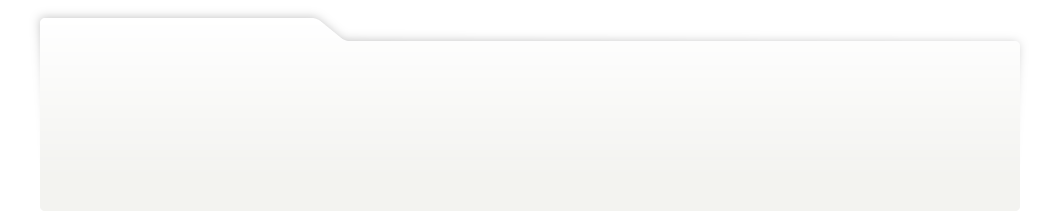
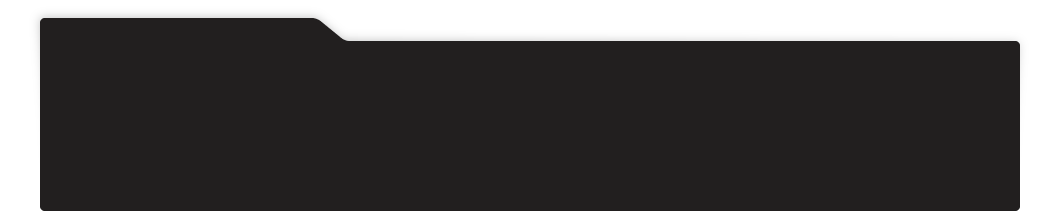
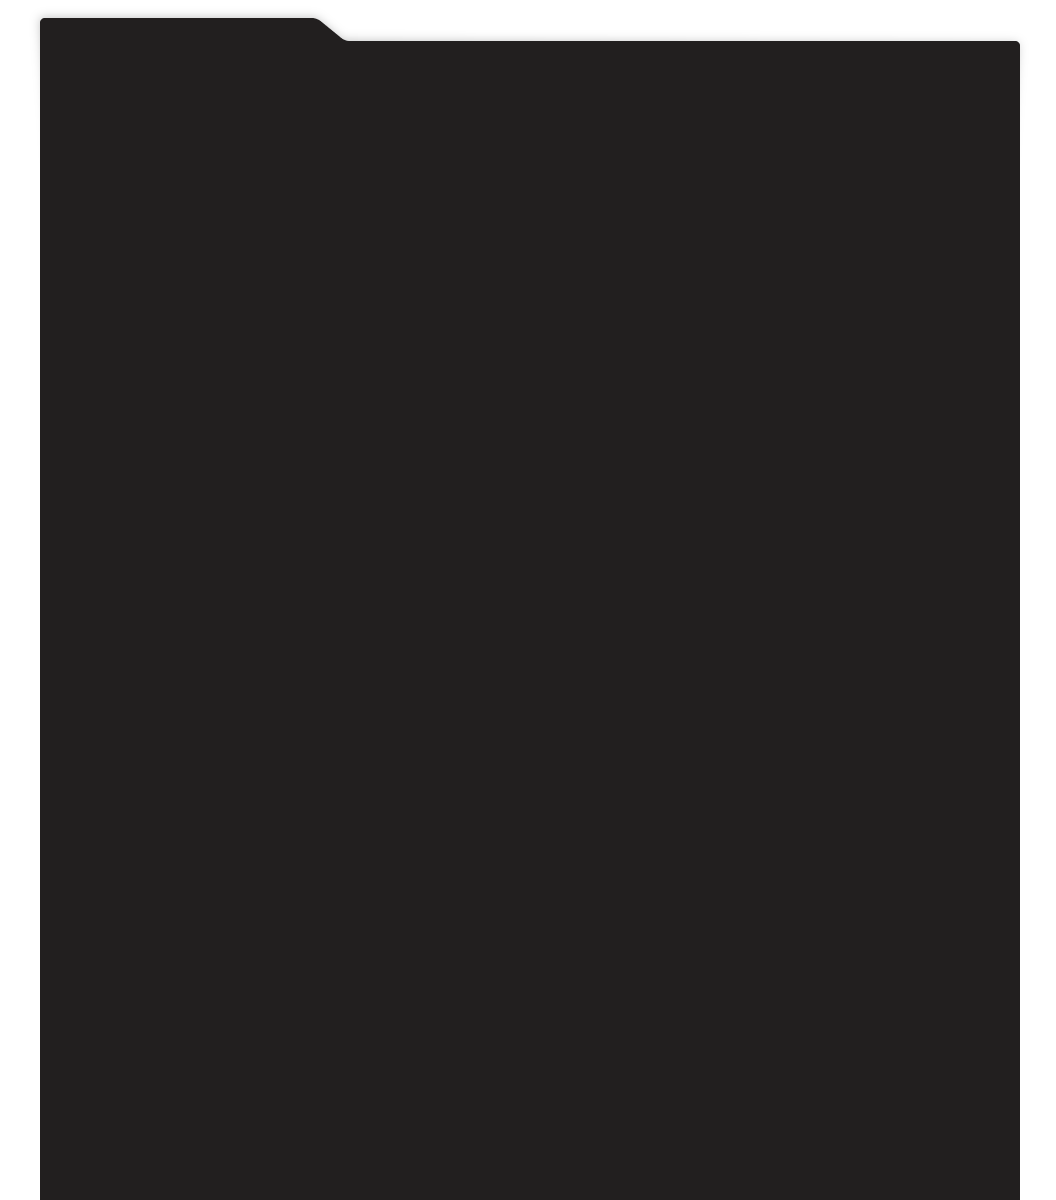
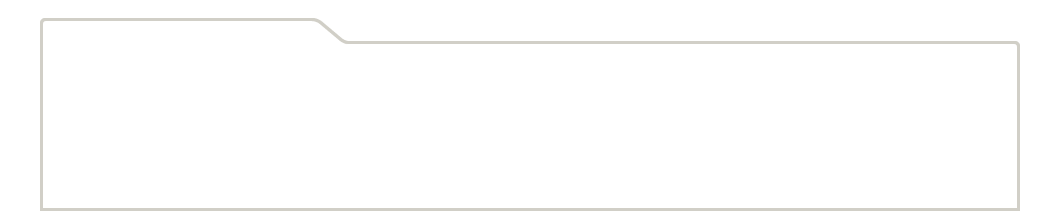
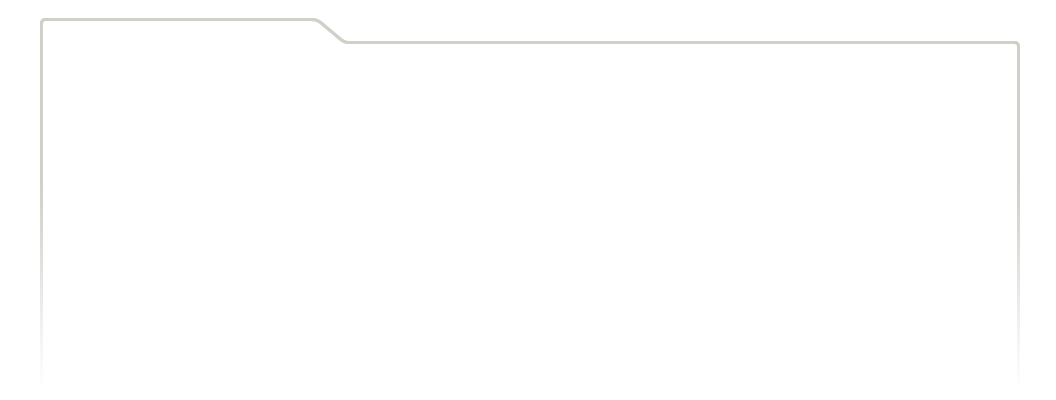
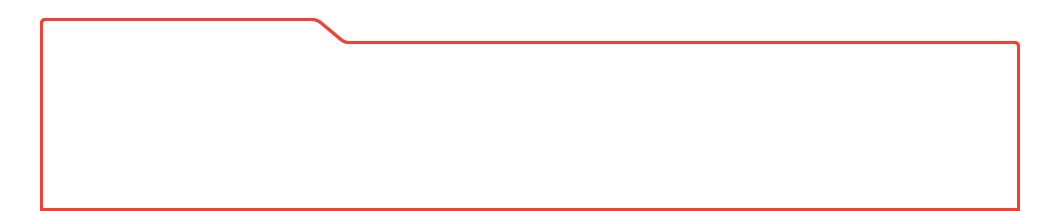
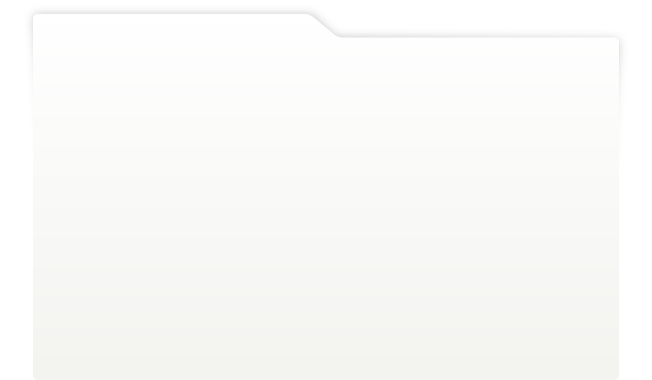
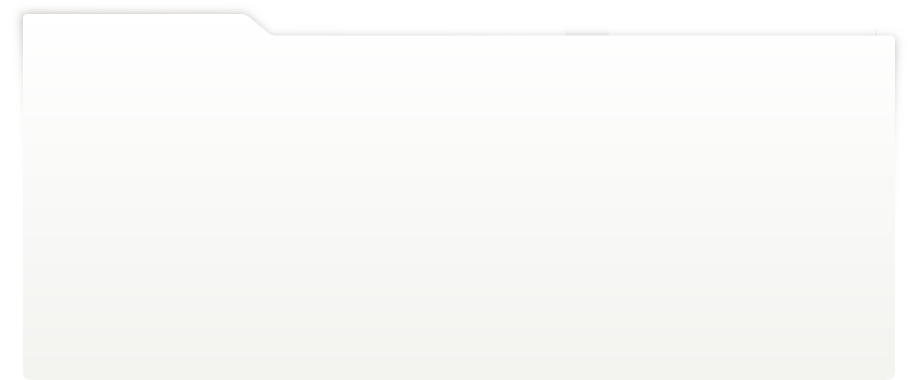
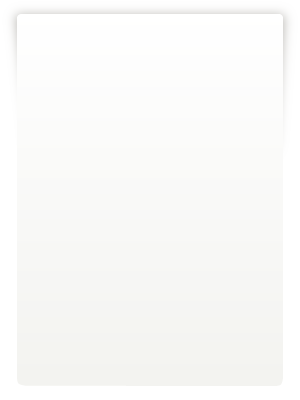
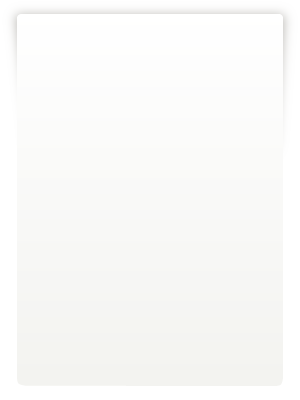
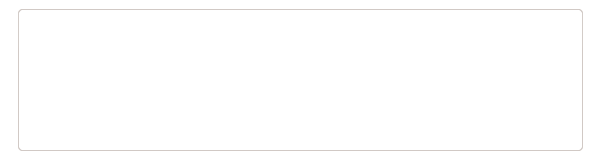
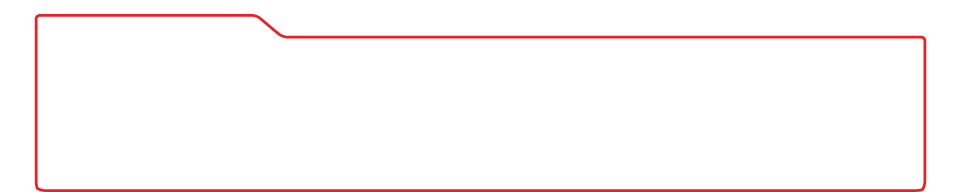
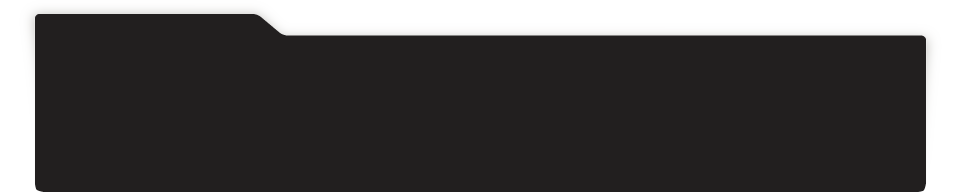
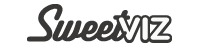
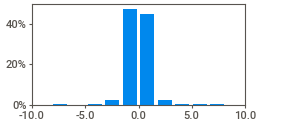
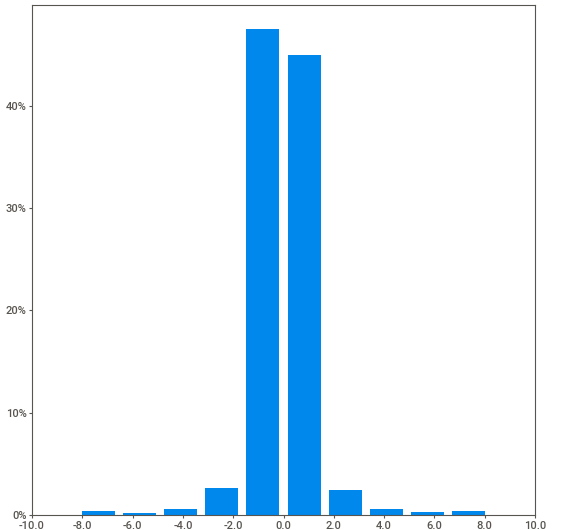
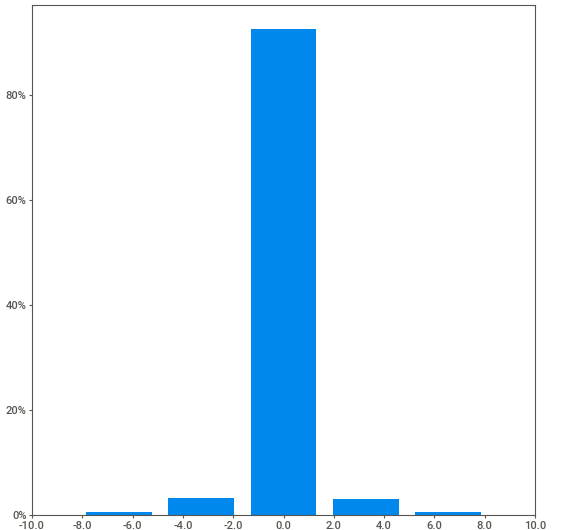
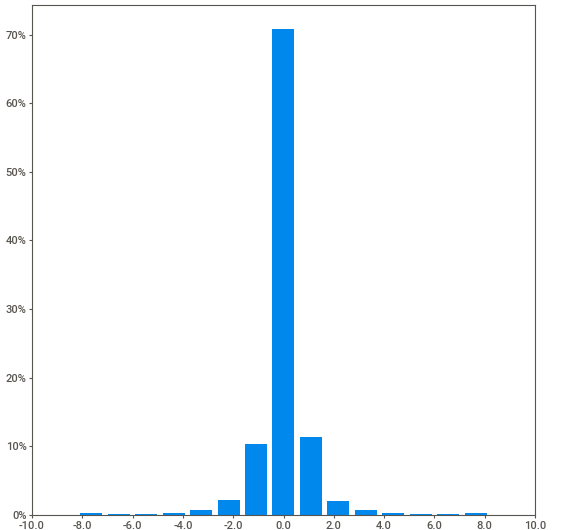
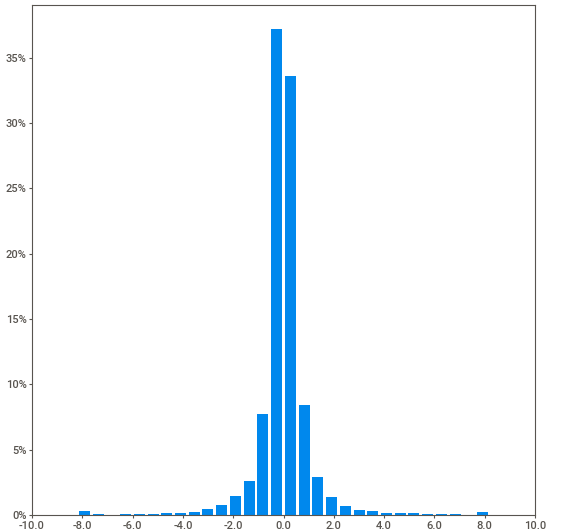
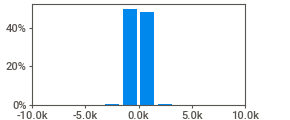
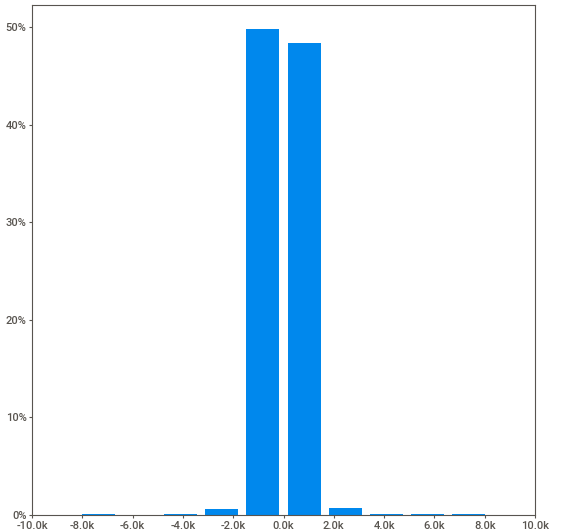
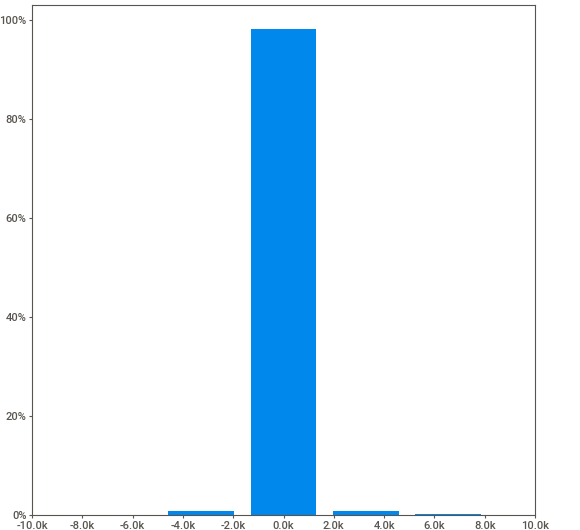
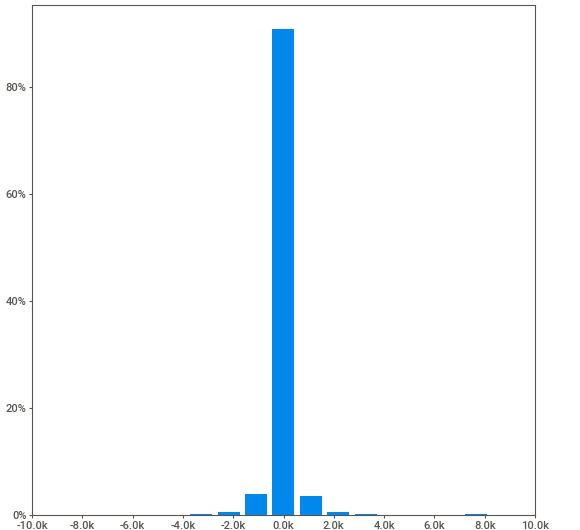
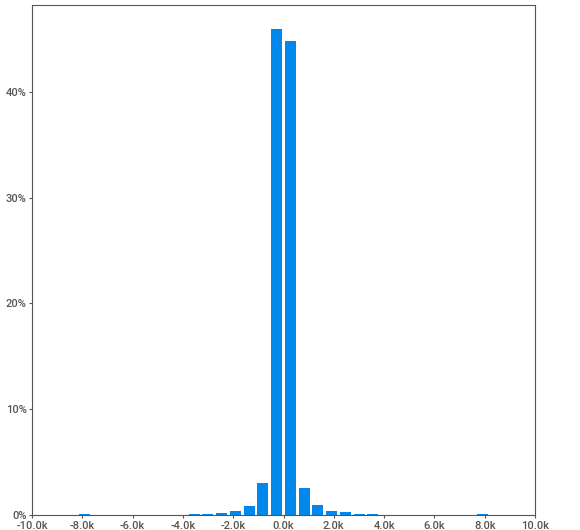
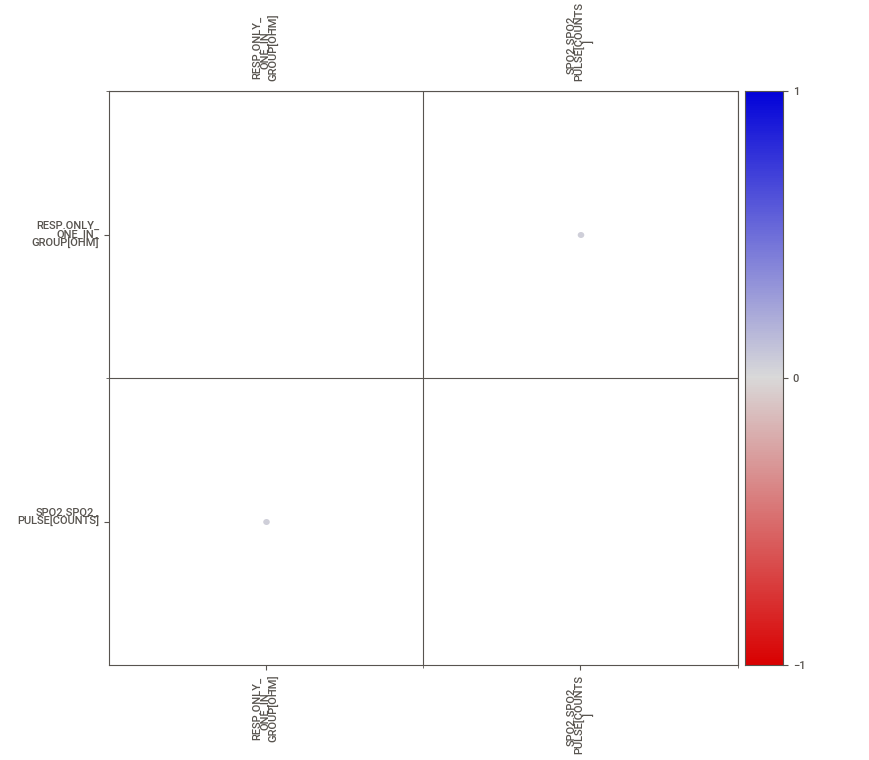
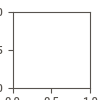

In [18]:
import sweetviz as sv
orig_data_report = sv.analyze(FinalData, pairwise_analysis = 'on')
orig_data_report.show_notebook()

Data segmentation

In [19]:
import math
import numpy as np
np_data = FinalData.to_numpy()
labels = State.to_numpy()
labels.astype('int')
nb_timestamps, nb_sensors = np_data.shape
window_size = 60 # Size of the data segments
timestamp_idx = 0 # Index along the timestamp dimension
segment_idx = 0 # Index for the segment dimension


nb_segments = int(math.floor(nb_timestamps/window_size))
print('Starting segmentation with a window size of %d resulting in %d segments ...' % (window_size,nb_segments))
data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)
labels_to_save = np.zeros(nb_segments,dtype=int)

while segment_idx < nb_segments:
    data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
    # Check the majority label ocurring in the considered window
    current_labels = labels[timestamp_idx:timestamp_idx+window_size]
    values, counts = np.unique(current_labels, return_counts=True)
    labels_to_save[segment_idx] = values[np.argmax(counts)]
    timestamp_idx += window_size
    segment_idx += 1

Starting segmentation with a window size of 60 resulting in 386 segments ...


In [20]:
data_to_save.shape

(386, 60, 2)

In [21]:
labels_to_save.shape

(386,)

In [22]:
set(labels_to_save)

{0, 1}

In [23]:

def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 4
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        features[i,:] = np.hstack([mean, median, std, min_val]).flatten()
    features = features.reshape(num_chunks, num_features, num_sensors)
    return features


In [24]:
new_array = extract_features(data_to_save, 10)

In [25]:
new_array.shape

(38, 4, 2)

In [26]:
#data_to_save = new_array

In [27]:
set(labels_to_save)

{0, 1}

In [28]:
labels_to_save.shape

(386,)

In [29]:
labels_to_save

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

Creating an additional table called Saved_data for further actions

In [30]:
Saved_data = data_to_save

In [31]:
Saved_data.shape

(386, 60, 2)

In [32]:
data_to_save = np.array(data_to_save) # this is the 3D array
data_to_save = data_to_save.reshape(data_to_save.shape[0], -1) # reshape to 2D array

In [33]:
data_to_save.shape

(386, 120)

In [34]:
test = data_to_save[0]

In [35]:
test.shape

(120,)

In [36]:
labels_to_save.shape

(386,)

In [37]:
from sklearn.preprocessing import LabelEncoder

shuffler = np.random.permutation(len(data_to_save))
X = data_to_save[shuffler]
y = labels_to_save[shuffler]

#le = LabelEncoder()
#y = le.fit_transform(y)

In [38]:
X.shape

(386, 120)

In [39]:
y.shape

(386,)

In [40]:
set(labels_to_save)

{0, 1}

In [41]:
set(y)
#y.shape

{0, 1}

In [42]:
X.shape

(386, 120)

In [43]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

le = LabelEncoder()
y = le.fit_transform(y)


In [44]:
print(X_train.size)
print(X_test.size)

32400
13920


In [45]:
print(y_train.size)
print(y_test.size)

270
116


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [47]:
# create the model
rfc = RandomForestClassifier()

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test set
rfc_prediction = rfc.predict(X_test)


acc = accuracy_score(y_test, rfc_prediction)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, rfc_prediction)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, rfc_prediction)
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 51.72%
Precision: 58.49%
Recall: 47.69%


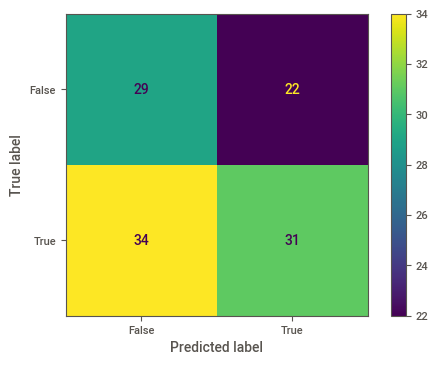

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(values_format='.0f')
plt.show()

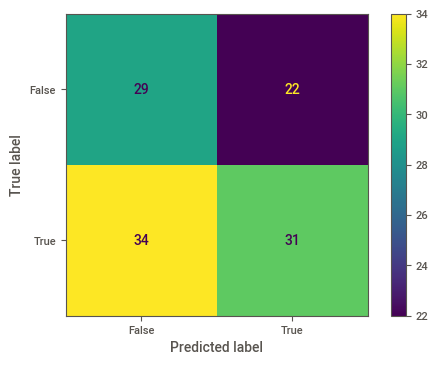

In [49]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(values_format='.0f')

plt.rcParams.update({'font.size': 12})
fig = plt.gcf()
fig.set_size_inches(6, 4)

plt.show()

In [50]:
#!pip install xgboost

In [51]:
import xgboost as xgb

# create the model
model = xgb.XGBClassifier()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 50.00%
Precision: 55.38%
Recall: 55.38%


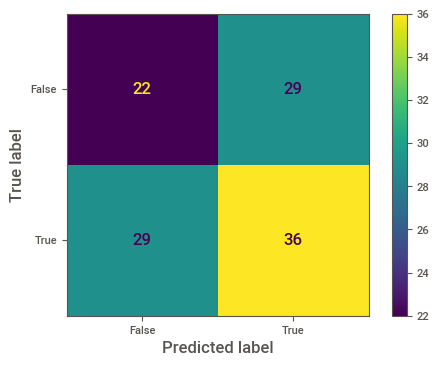

In [52]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(values_format='.0f')
plt.show()

In [53]:
from sklearn import svm

# create the model
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))


Accuracy: 42.24%
Precision: 48.28%
Recall: 43.08%


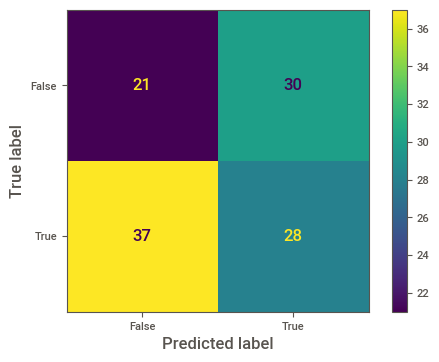

In [54]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(values_format='.0f')
plt.show()

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [56]:
'''
# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
'''

'\n# Create an instance of the MLPClassifier\nclf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,\n                    solver=\'sgd\', verbose=10, tol=1e-4, random_state=42,\n                    learning_rate_init=.1)\n\n# Fit the model to the training data\nclf.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = clf.predict(X_test)\n\n# Evaluate the model\'s performance\nacc = accuracy_score(y_test, y_pred)\nprint("Accuracy: %.2f%%" % (acc * 100.0))\nprecision = precision_score(y_test, y_pred)\nprint("Precision: %.2f%%" % (precision * 100.0))\nrecall = recall_score(y_test, y_pred)\nprint("Recall: %.2f%%" % (recall * 100.0))\n'

# K Fold Cross Validation

In [57]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds
n_folds = 5

# Create an instance of the KFold class
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)


In [58]:
# Define the RFC model
rfc = RandomForestClassifier()

# Initialize a list to store the accuracy scores
acc_scores_RFC = []
precision_scores_RFC = []
recall_scores_RFC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_RFC.append(acc)
    precision_scores_RFC.append(precision)
    recall_scores_RFC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_RFC))
print("Mean precission:", np.mean(precision_scores_RFC))
print("Mean recall:", np.mean(recall_scores_RFC))

Mean accuracy: 0.5726606726606727
Mean precission: 0.5902425480433555
Mean recall: 0.6532658669244035


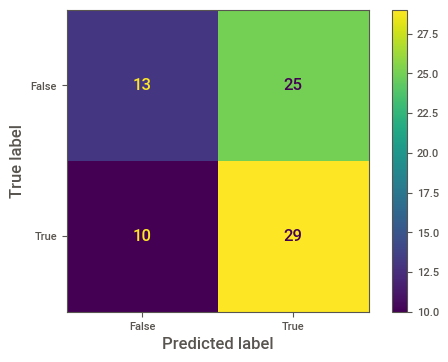

In [59]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(values_format='.0f')
plt.show()

In [60]:
# Define the XGboost model
model = xgb.XGBClassifier()

# Initialize a list to store the accuracy scores
acc_scores_XGB = []
precision_scores_XGB = []
recall_scores_XGB = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_XGB.append(acc)
    precision_scores_XGB.append(precision)
    recall_scores_XGB.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_XGB))
print("Mean precission:", np.mean(precision_scores_XGB))
print("Mean recall:", np.mean(recall_scores_XGB))

Mean accuracy: 0.5568764568764568
Mean precission: 0.5784359119141728
Mean recall: 0.6036621373206739


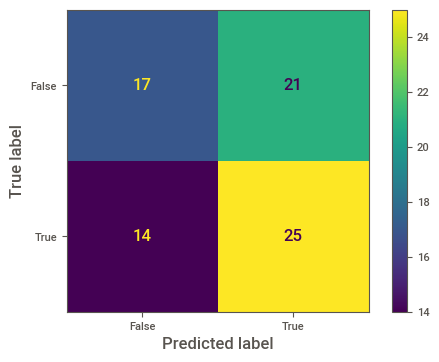

In [61]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(values_format='.0f')
plt.show()

In [62]:
# Define the SVM model
SVM = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Initialize a list to store the accuracy scores
acc_scores_SVC = []
precision_scores_SVC = []
recall_scores_SVC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    SVM.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = SVM.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_SVC.append(acc)
    precision_scores_SVC.append(precision)
    recall_scores_SVC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_SVC))
print("Mean precission:", np.mean(precision_scores_SVC))
print("Mean recall:", np.mean(recall_scores_SVC))

Mean accuracy: 0.5103563103563105
Mean precission: 0.5299911543564794
Mean recall: 0.7389815604449751


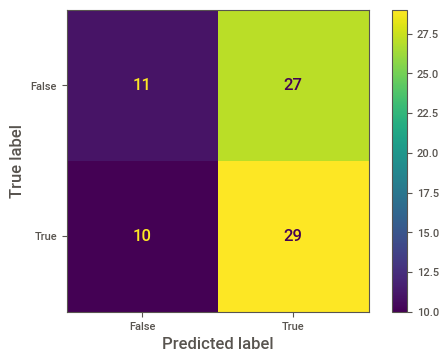

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(values_format='.0f')
plt.show()

Power spectrum

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
'''
# Compute the FFT of the signal along the first axis
fft = np.fft.fft(Saved_data, axis=0)

# Compute the power spectrum
power_spectrum = np.abs(fft)**2

# Plot the power spectrum of 5 slices along the first axis
for i in range(25):
    plt.plot(power_spectrum[:, i, 0])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal (Slice {i})')
    plt.show()
'''

"\n# Compute the FFT of the signal along the first axis\nfft = np.fft.fft(Saved_data, axis=0)\n\n# Compute the power spectrum\npower_spectrum = np.abs(fft)**2\n\n# Plot the power spectrum of 5 slices along the first axis\nfor i in range(25):\n    plt.plot(power_spectrum[:, i, 0])\n    plt.xlabel('Frequency (bins)')\n    plt.ylabel('Power')\n    plt.title(f'Power Spectrum of Signal (Slice {i})')\n    plt.show()\n"

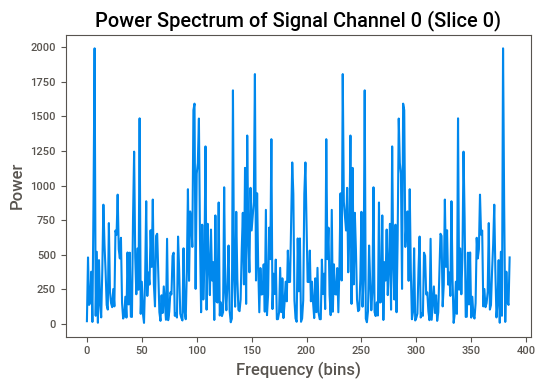

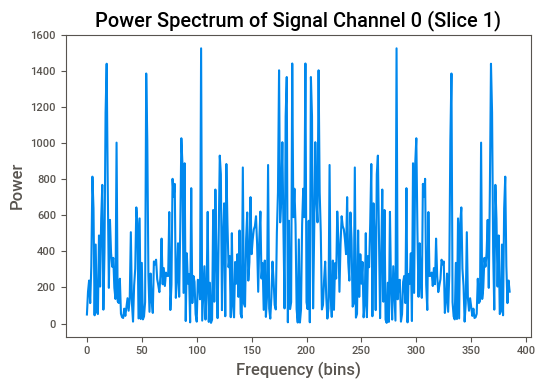

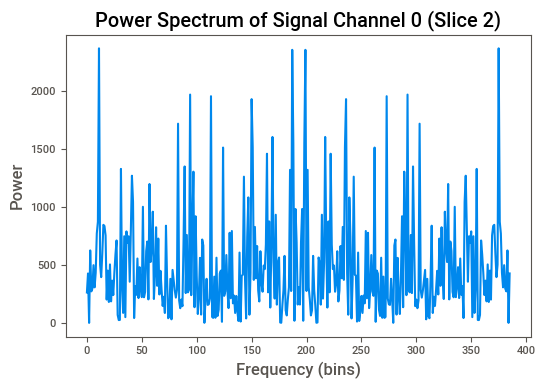

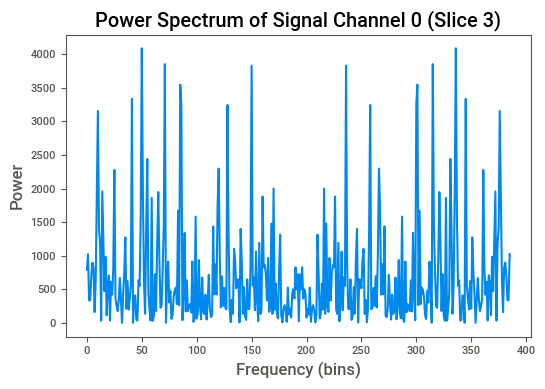

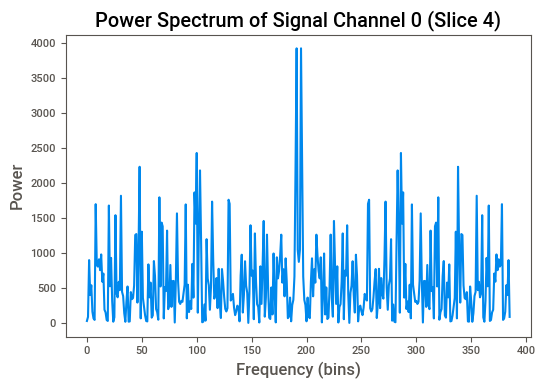

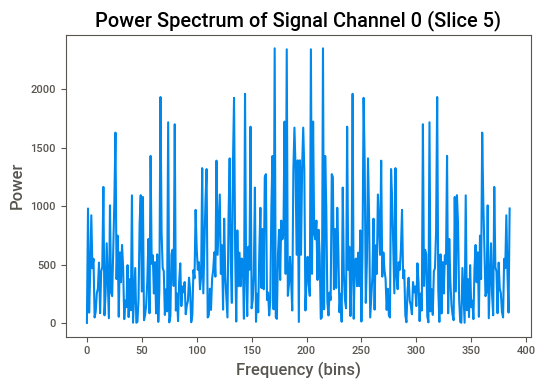

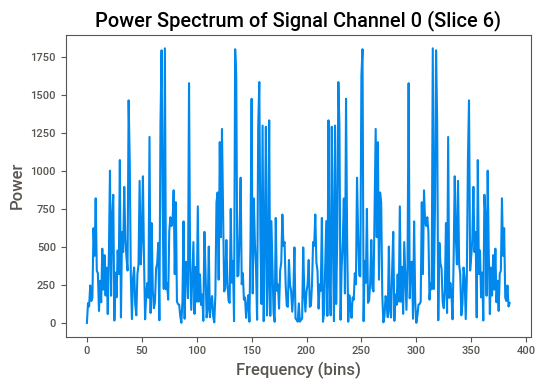

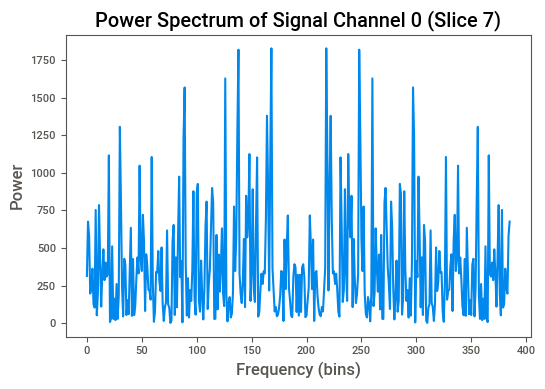

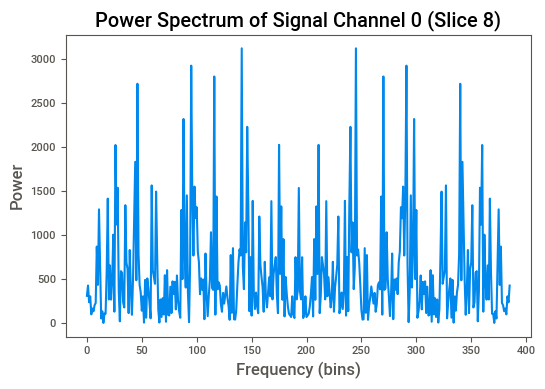

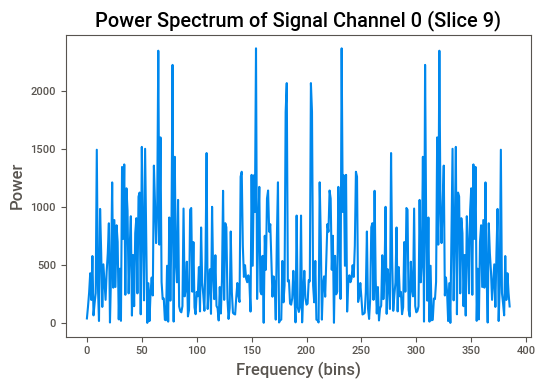

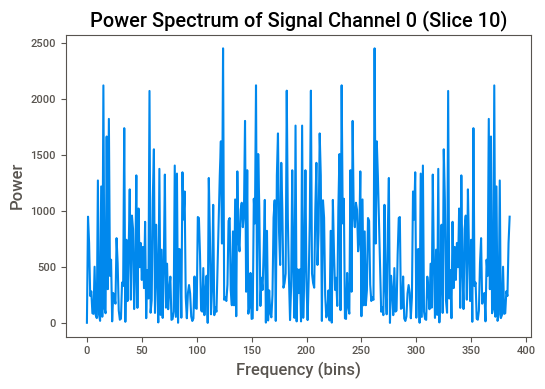

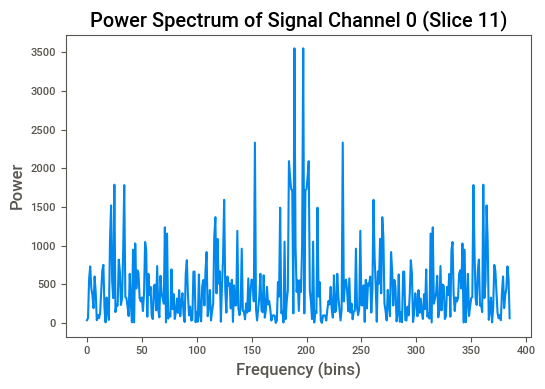

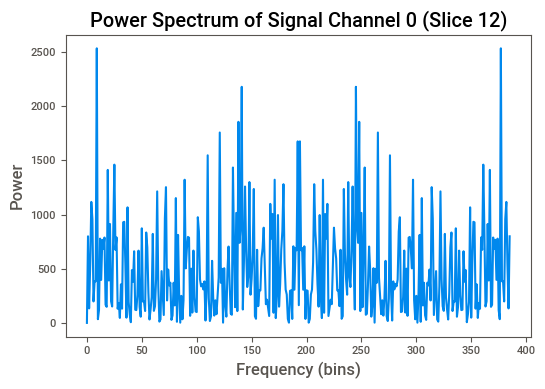

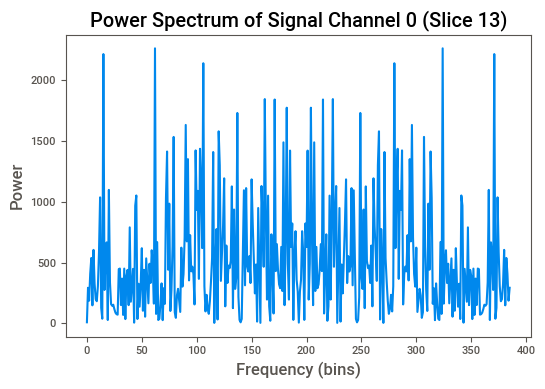

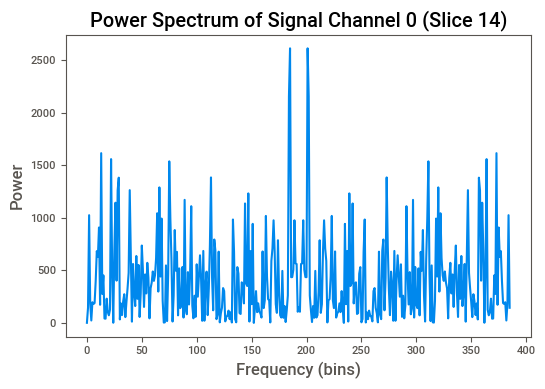

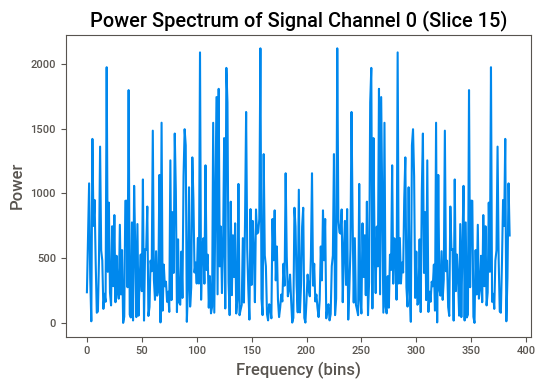

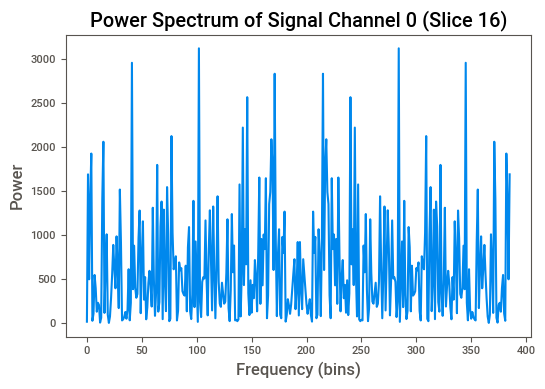

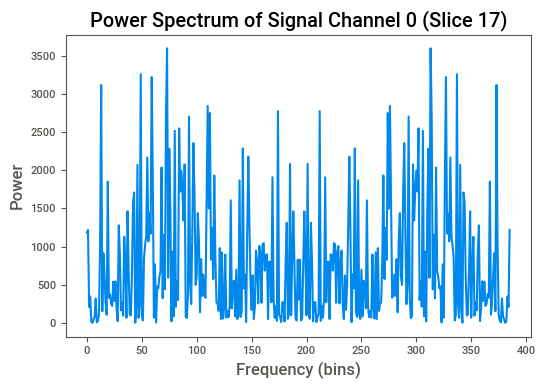

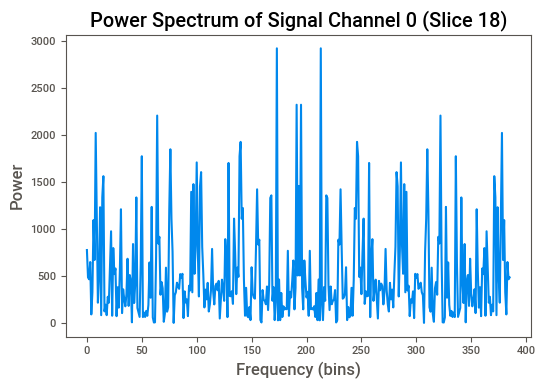

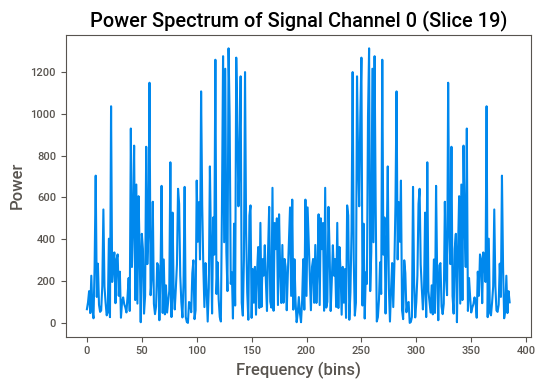

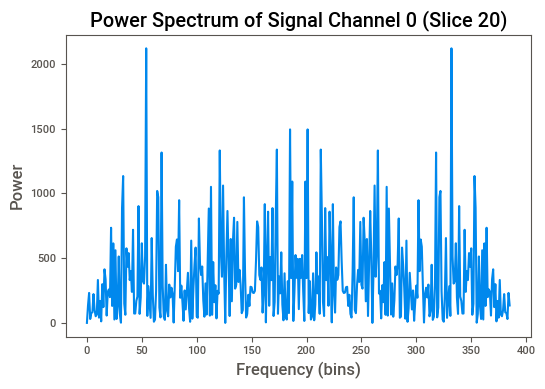

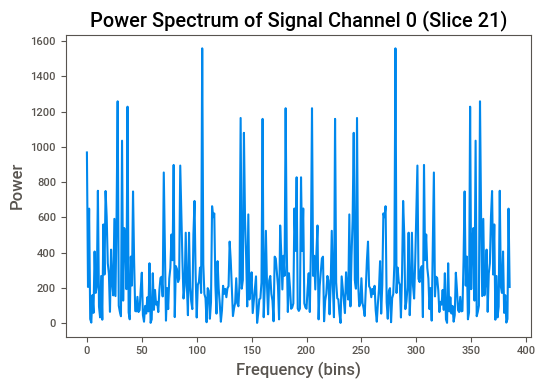

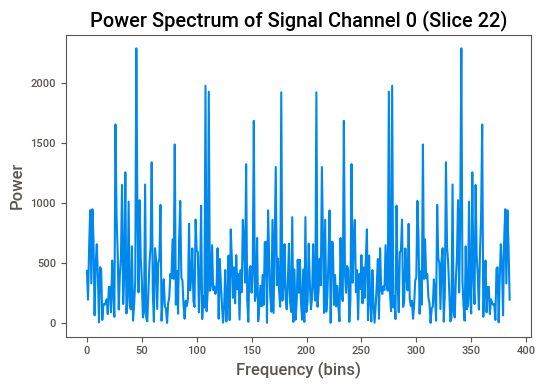

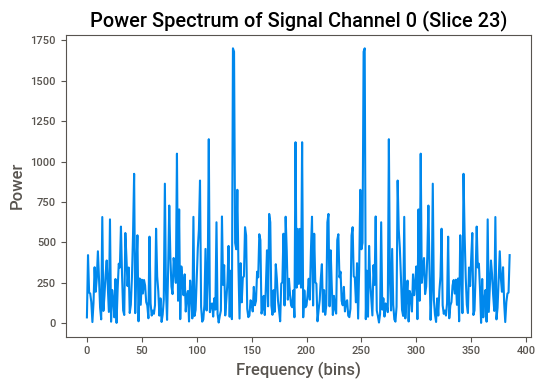

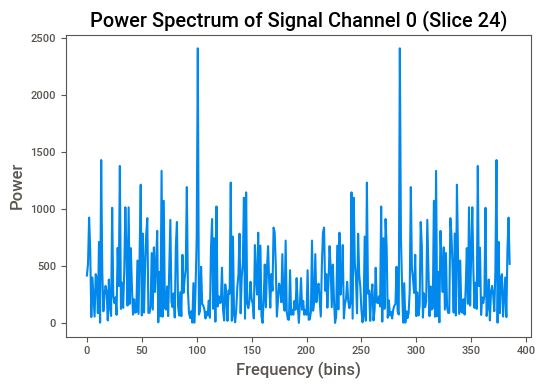

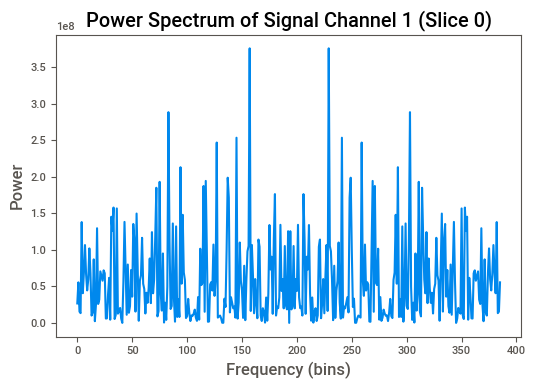

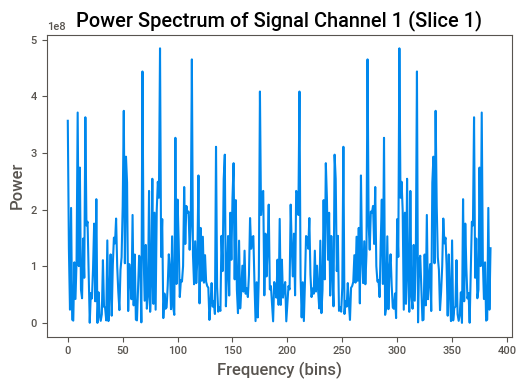

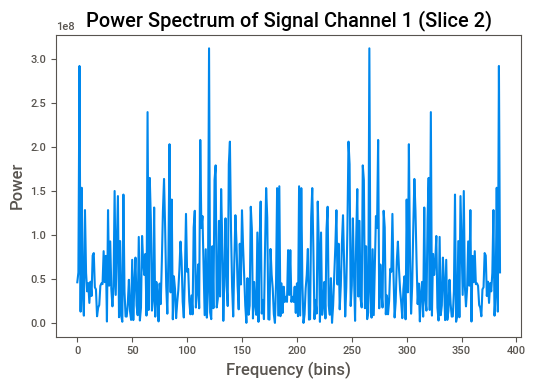

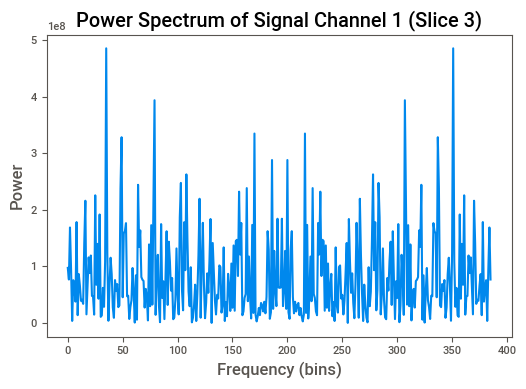

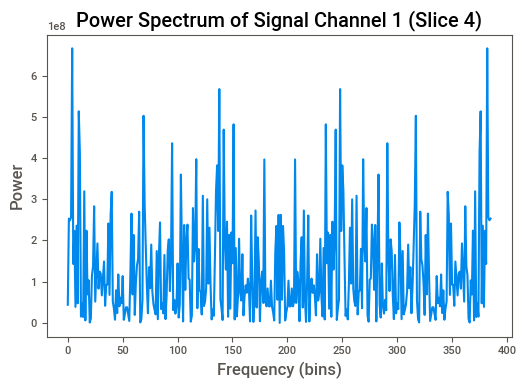

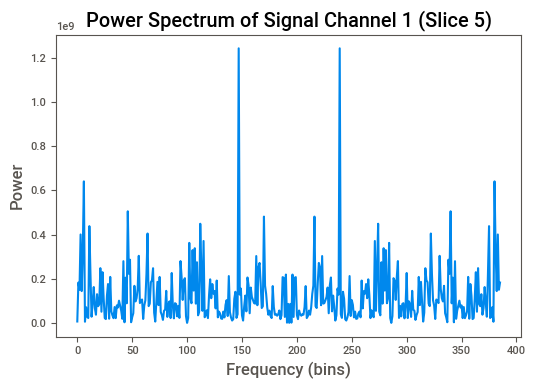

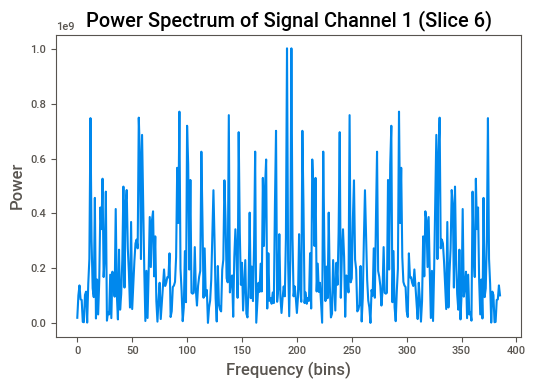

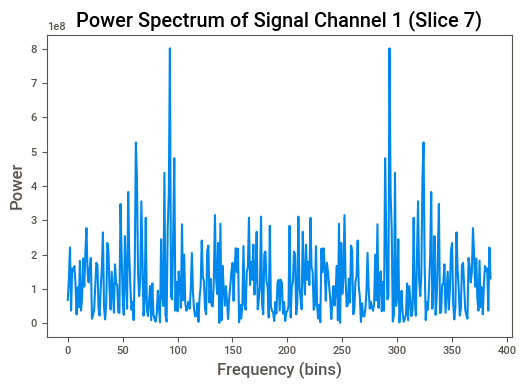

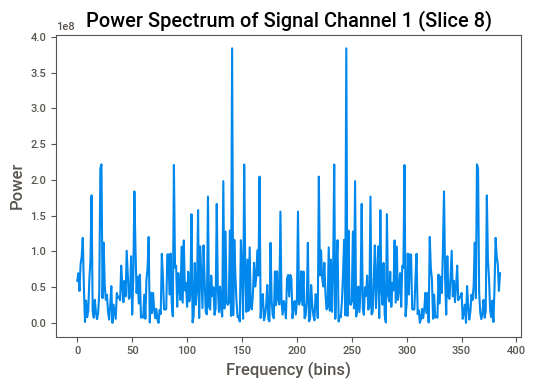

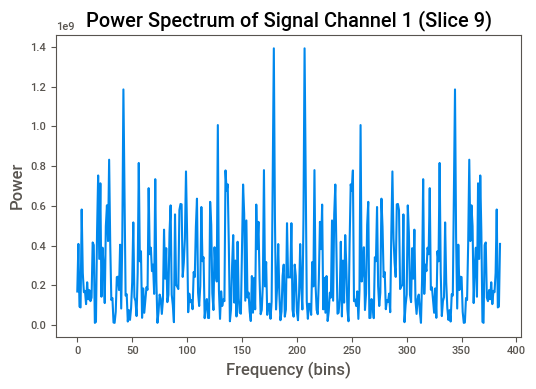

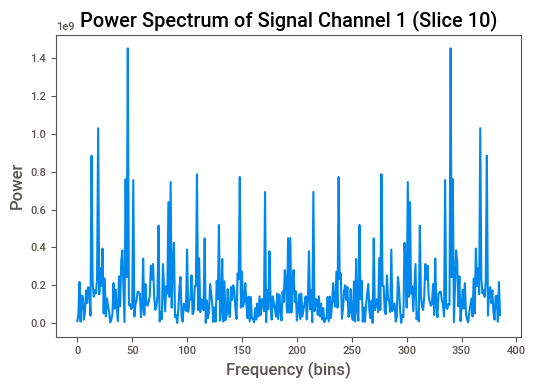

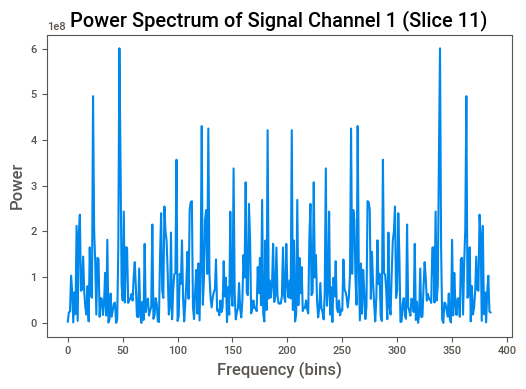

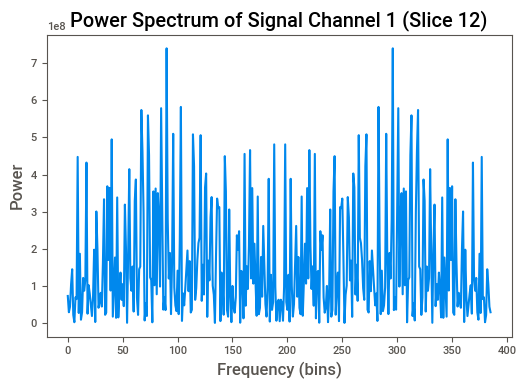

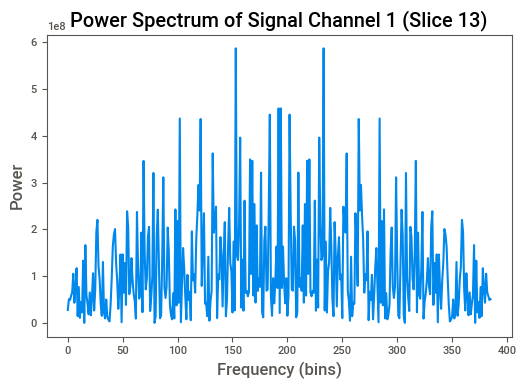

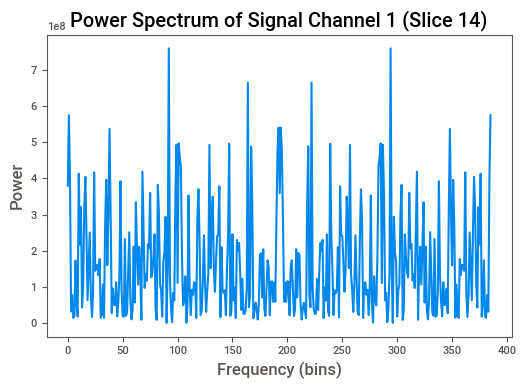

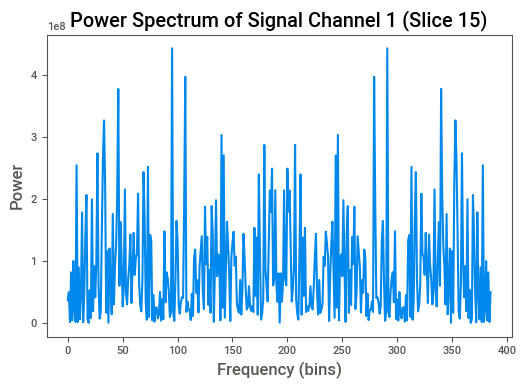

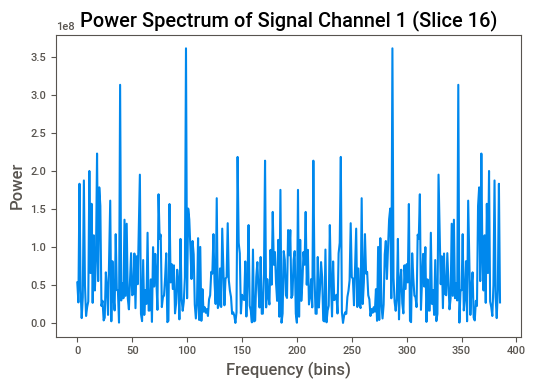

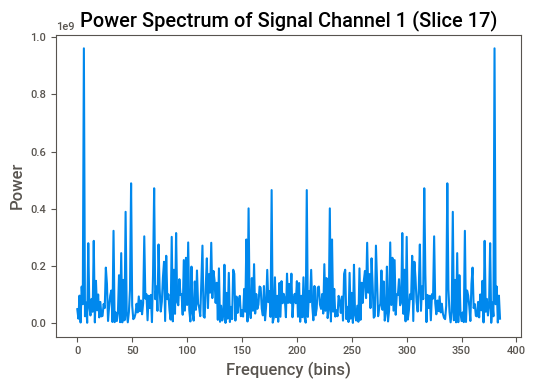

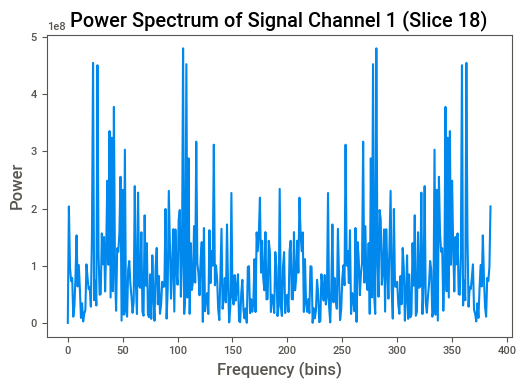

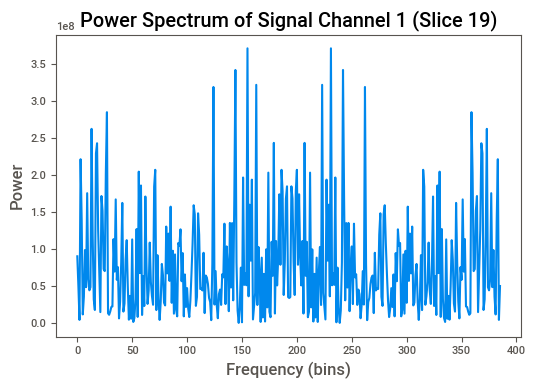

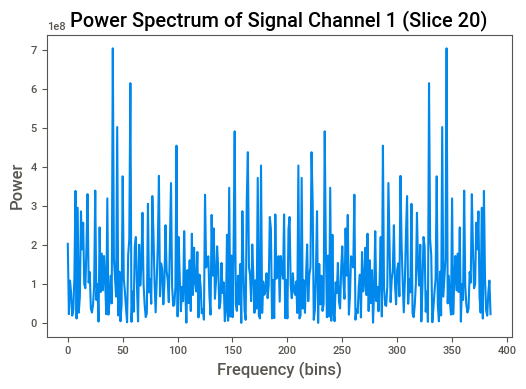

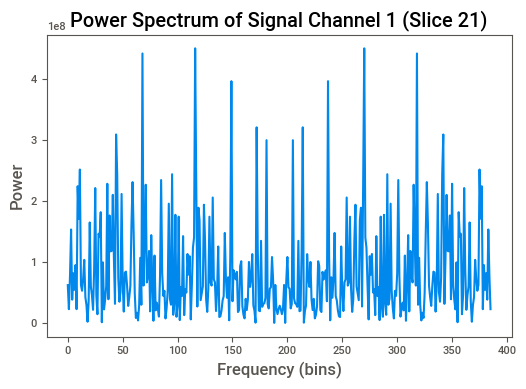

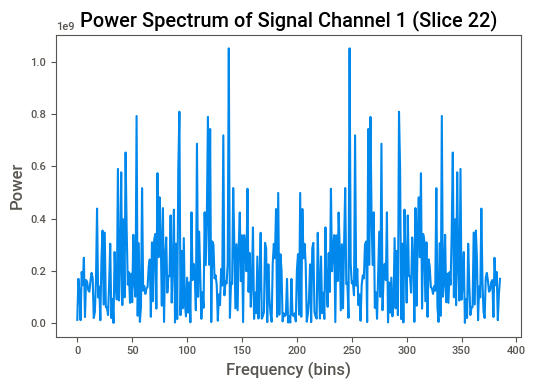

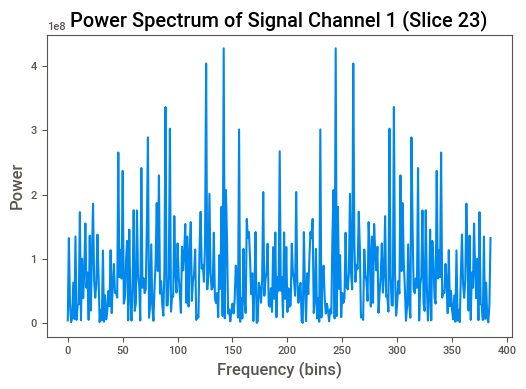

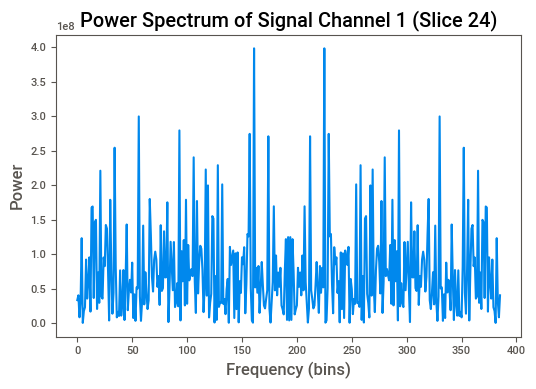

In [66]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(power_spectrum0[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(power_spectrum1[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Confusion matrix

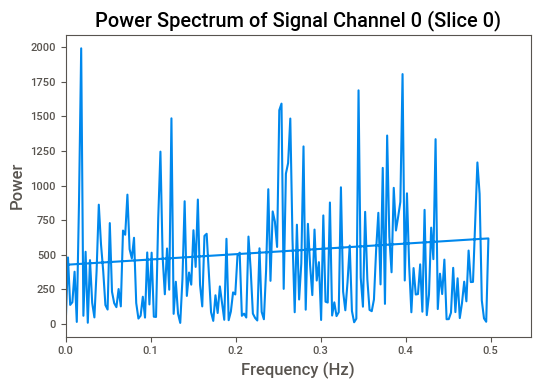

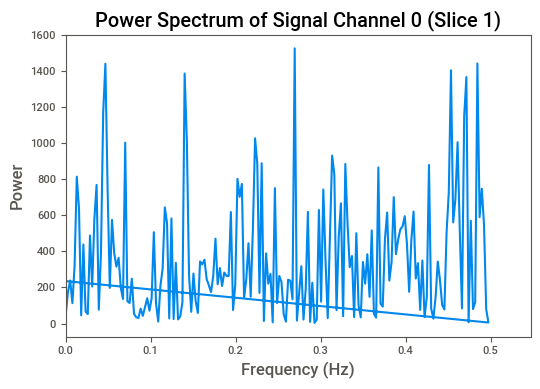

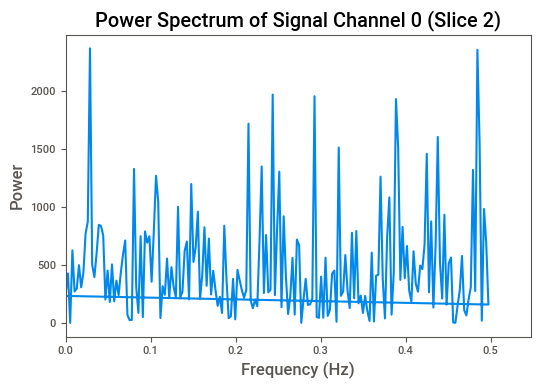

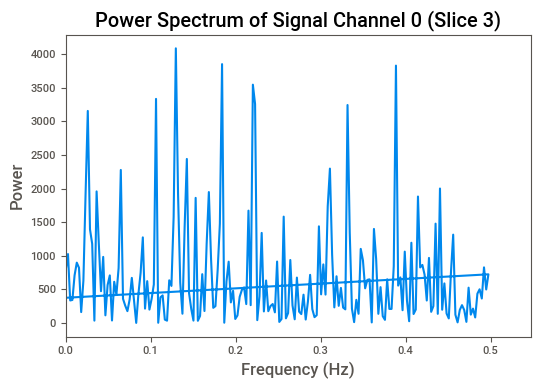

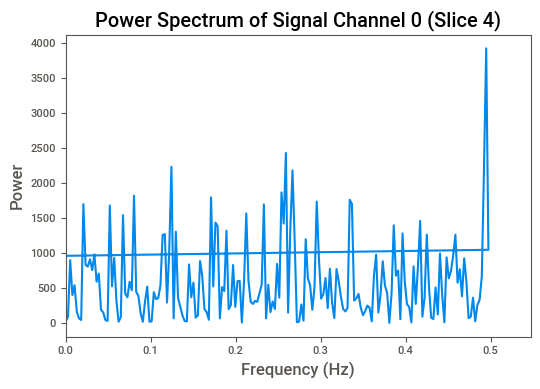

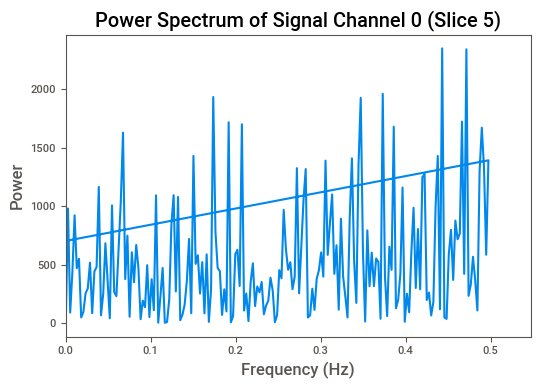

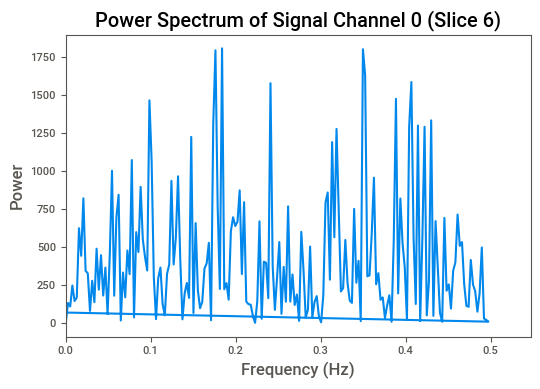

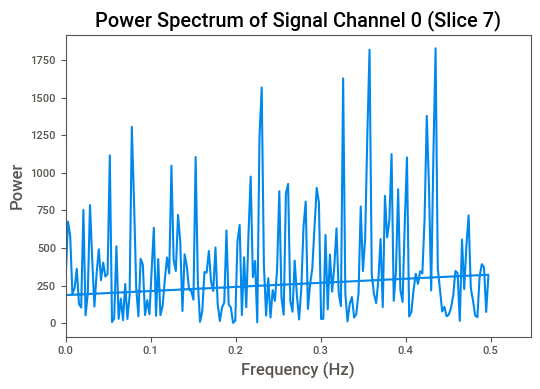

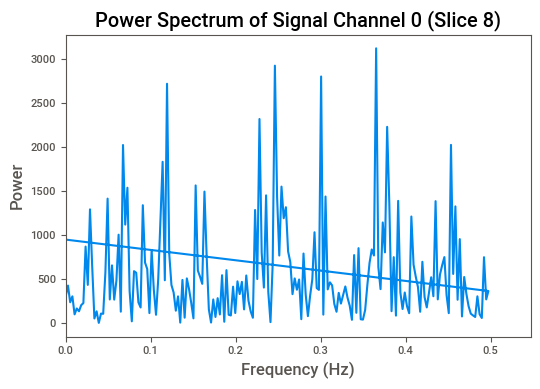

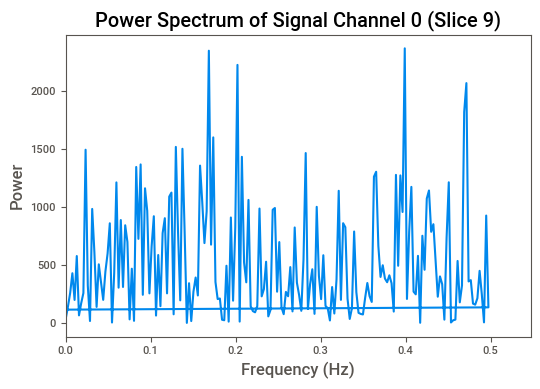

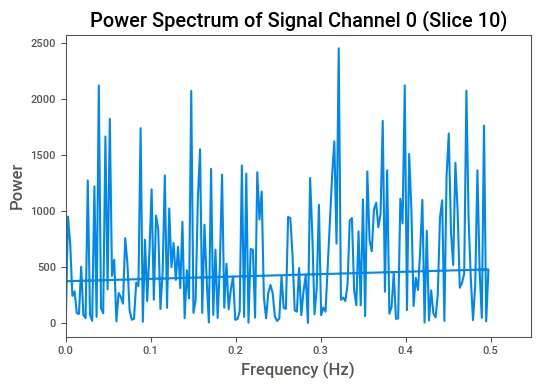

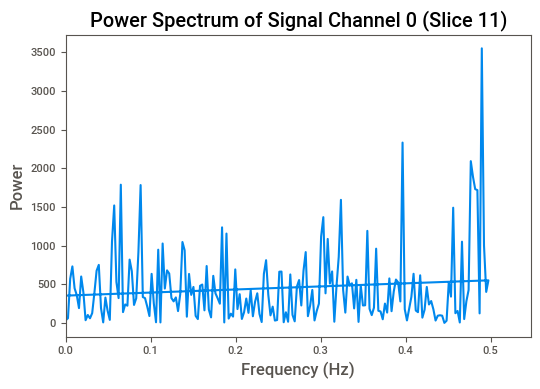

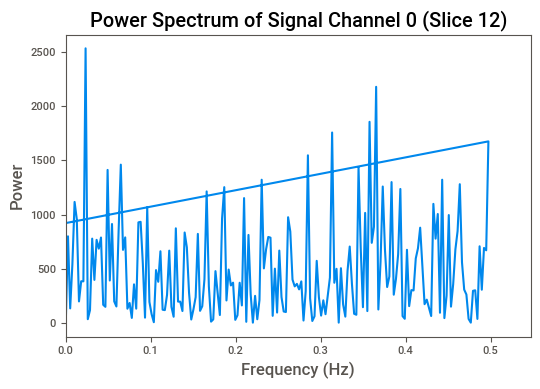

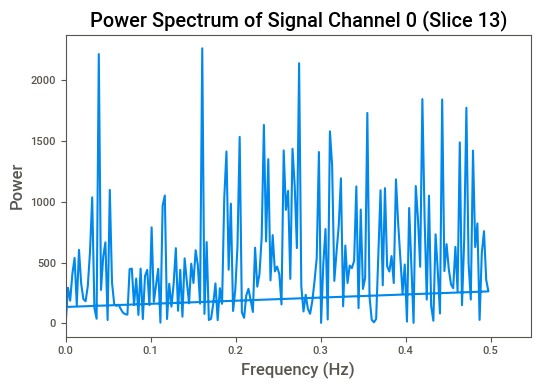

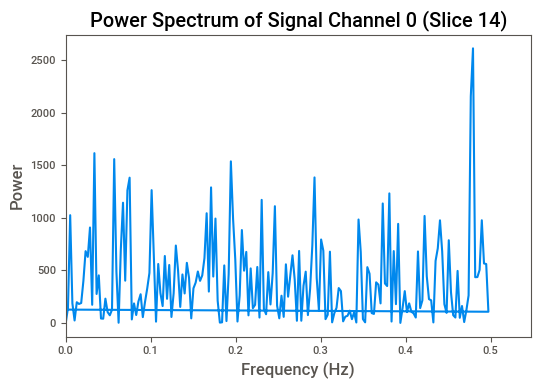

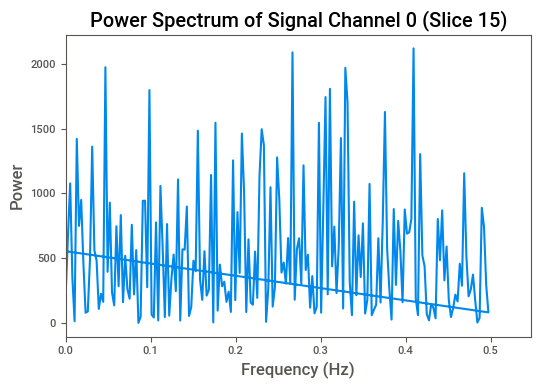

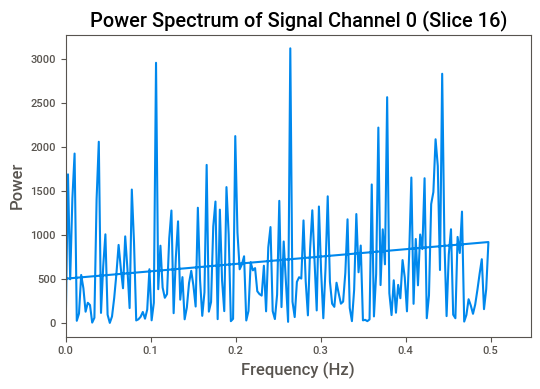

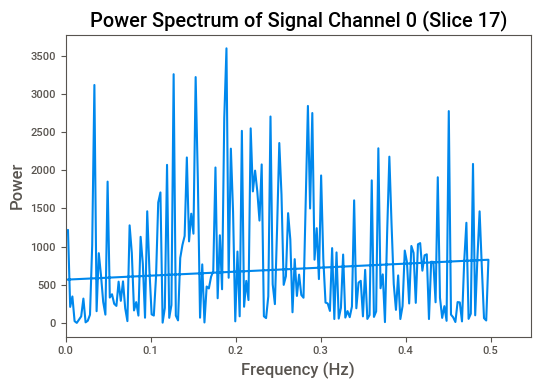

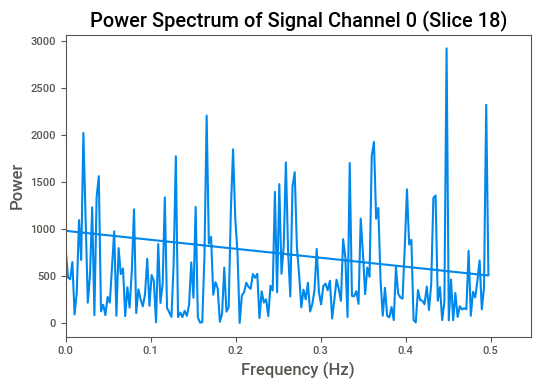

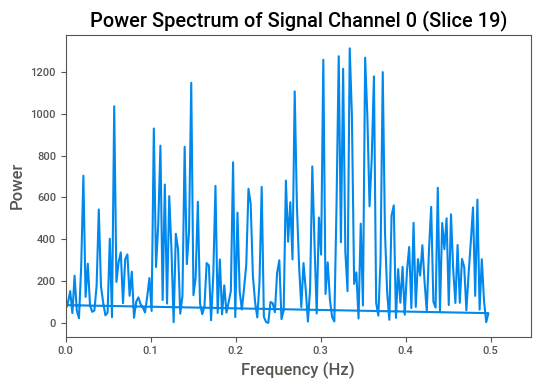

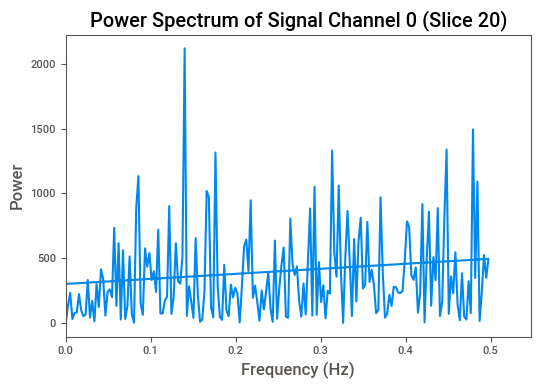

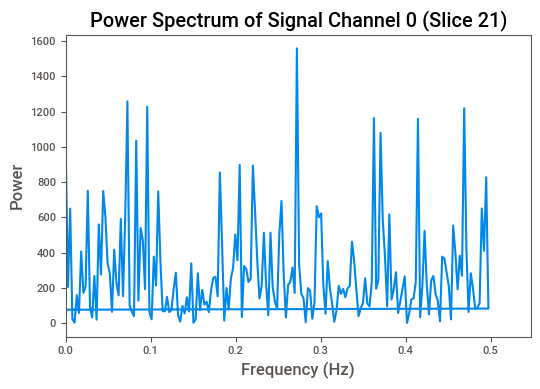

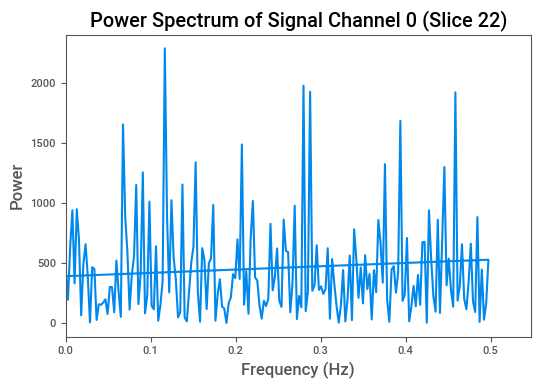

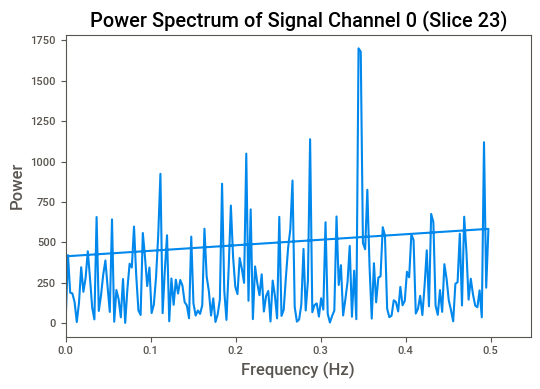

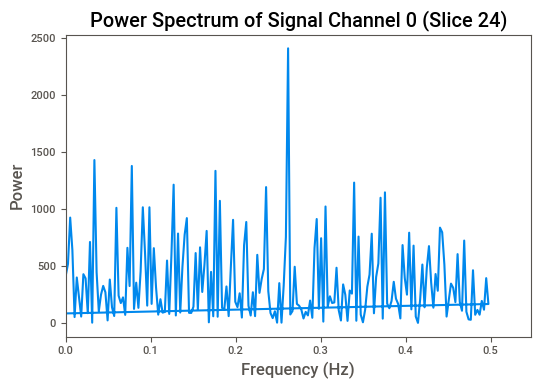

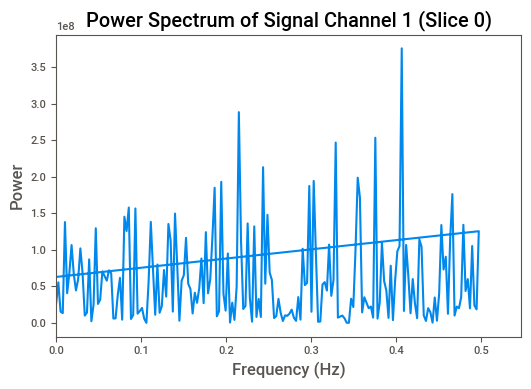

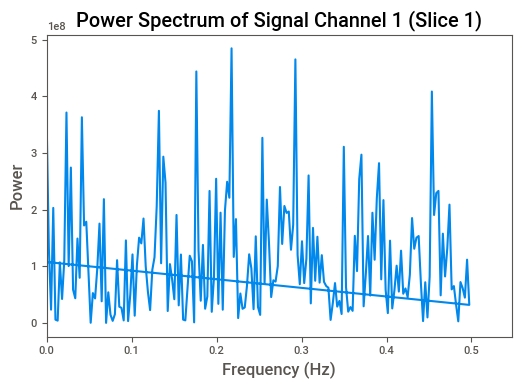

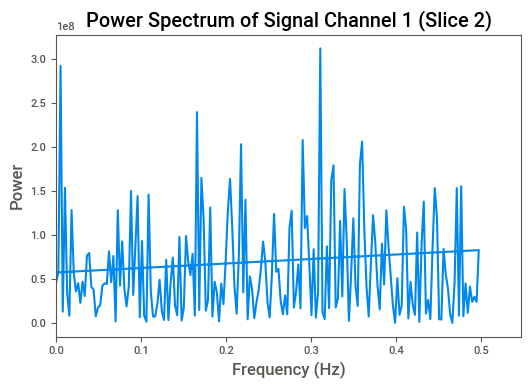

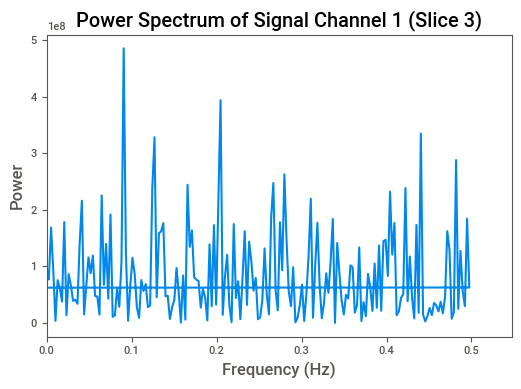

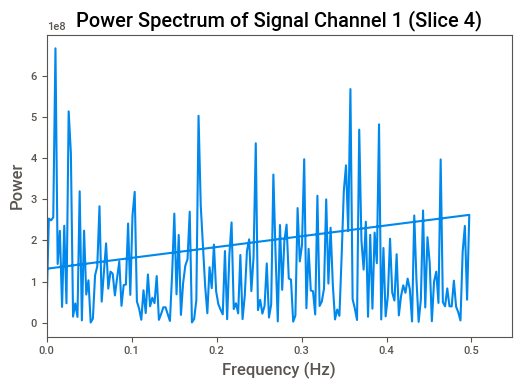

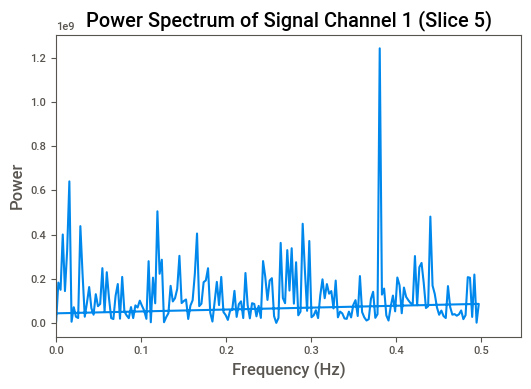

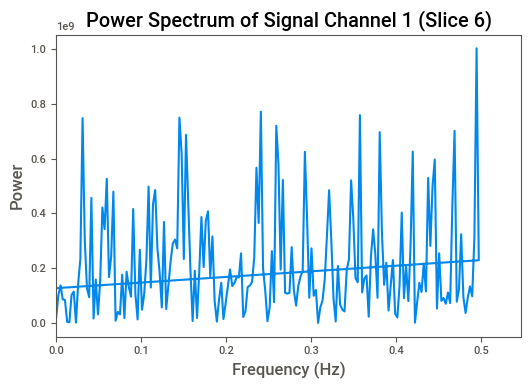

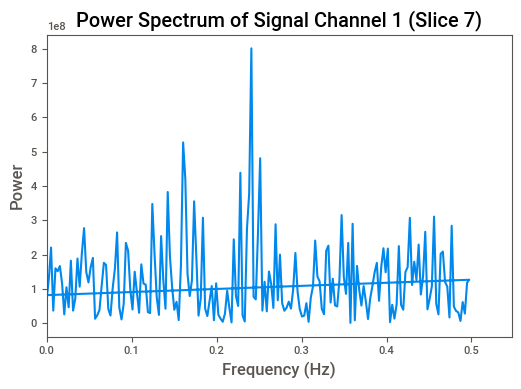

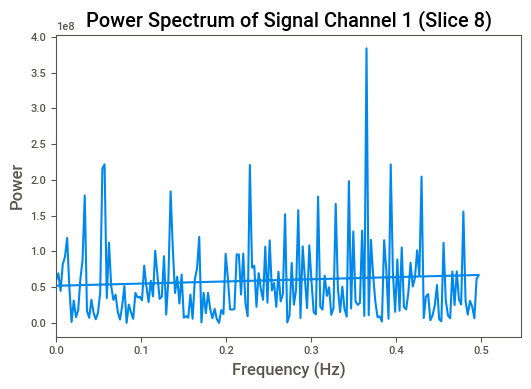

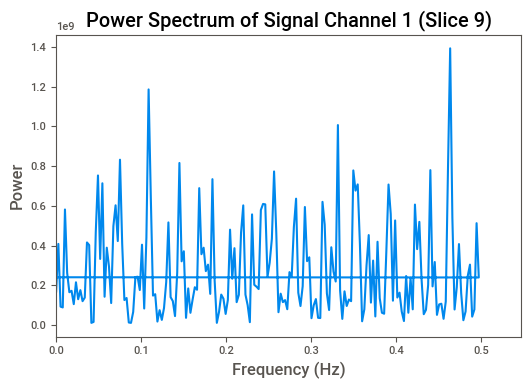

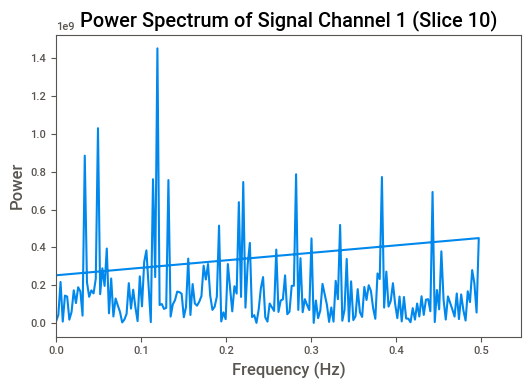

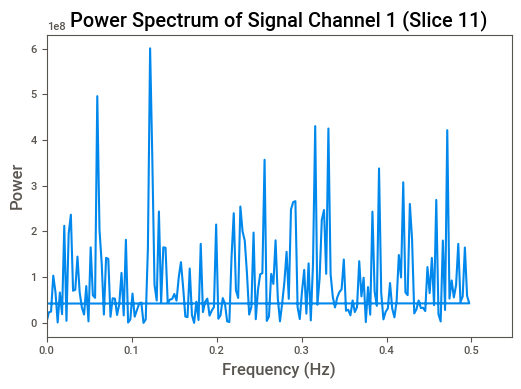

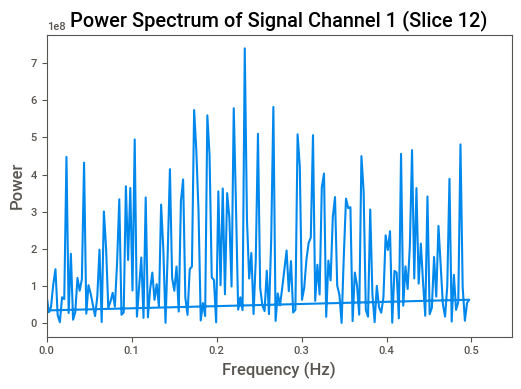

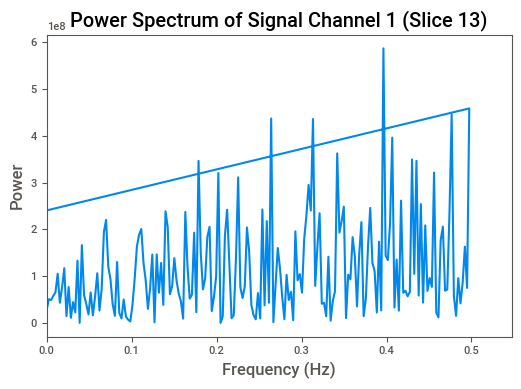

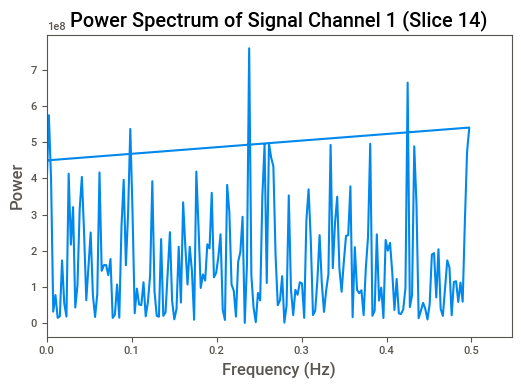

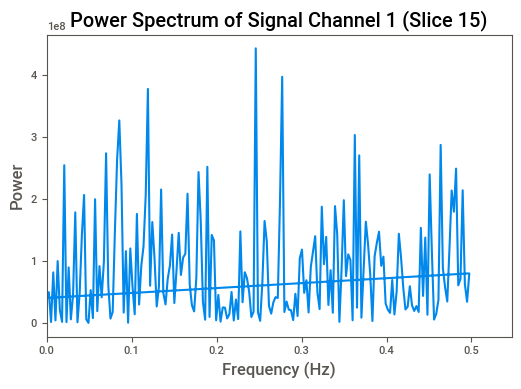

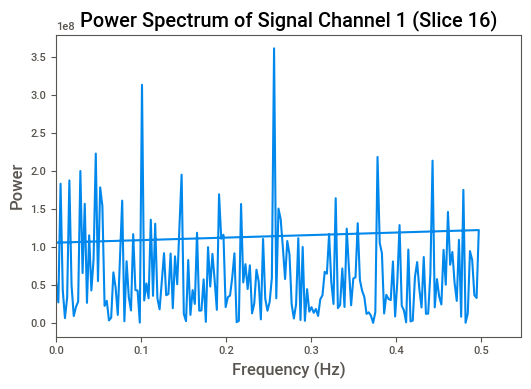

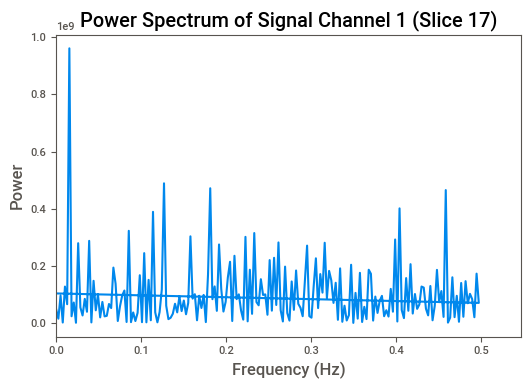

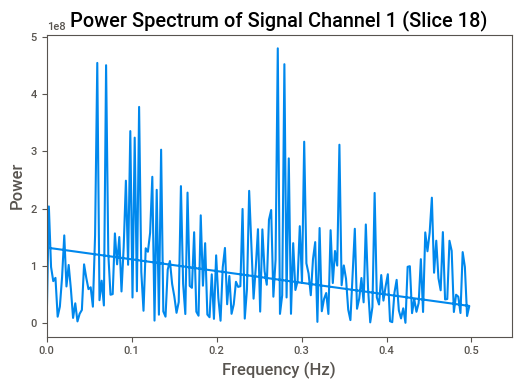

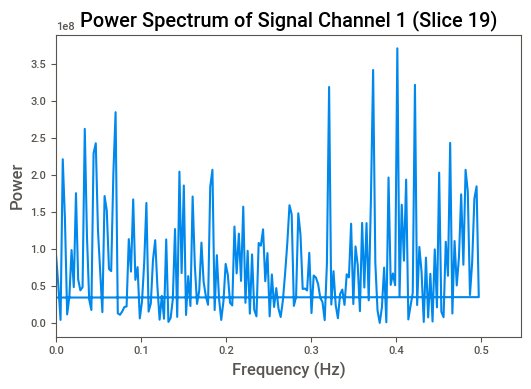

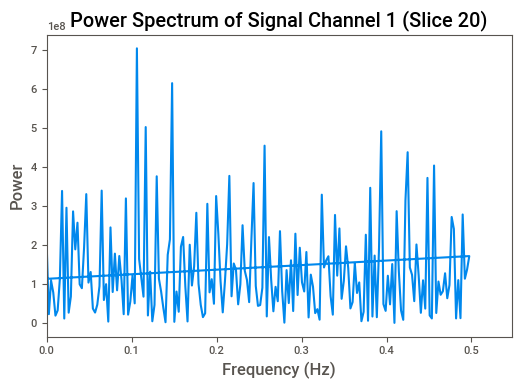

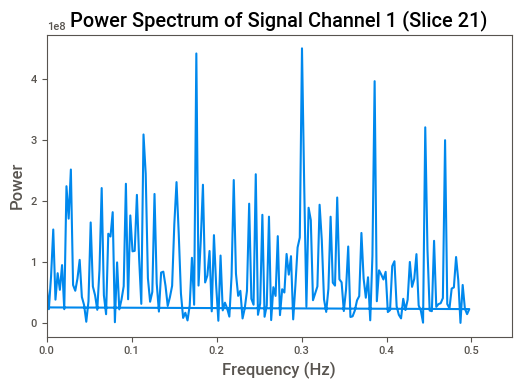

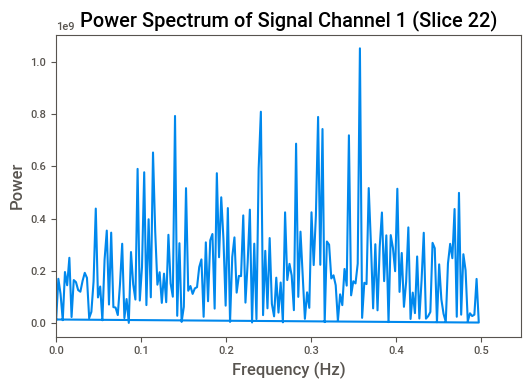

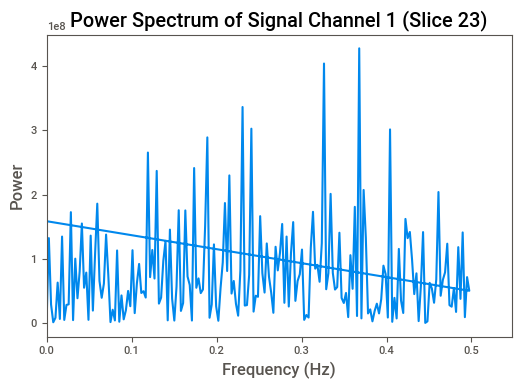

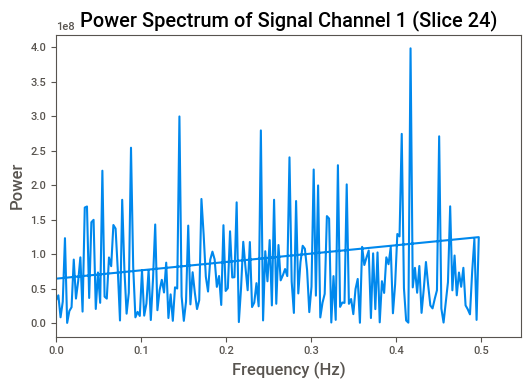

In [67]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

# Sampling rate
sampling_rate = 1

# Number of samples
N = Saved_data.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies0 = np.fft.fftfreq(N, 1/sampling_rate)
frequencies1 = np.fft.fftfreq(N, 1/sampling_rate)

plots = 25

for i in range(plots):
    plt.plot(frequencies0, power_spectrum0[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

for i in range(plots):
    plt.plot(frequencies1, power_spectrum1[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Plots prepared for newly preprocessed data

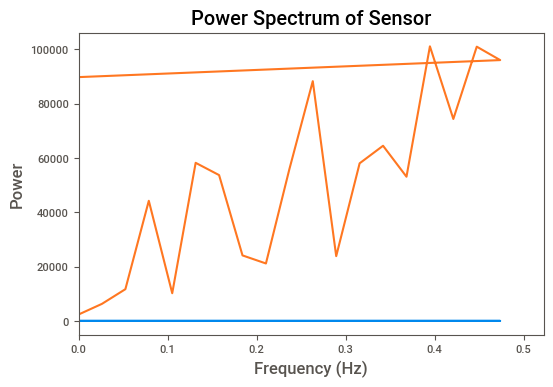

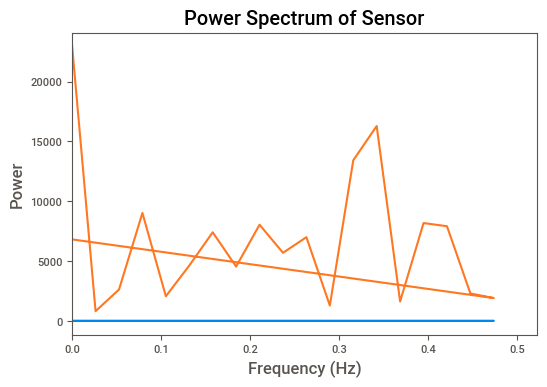

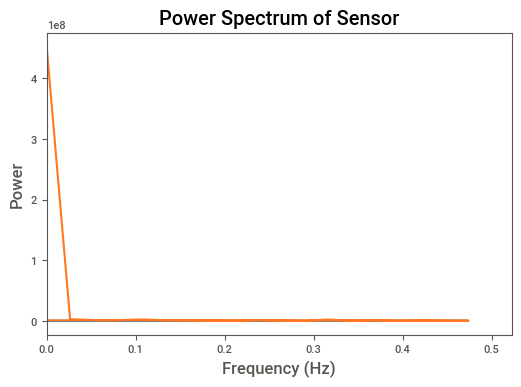

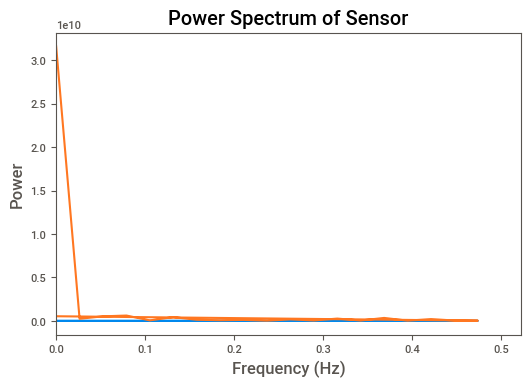

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT of the signal along the first axis for each sensor
fft = np.fft.fft(new_array, axis=0)

# Compute the power spectrum for each sensor
power_spectrum = np.abs(fft)**2

# Sampling rate
sampling_rate = 1

# Number of samples
N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies = np.fft.fftfreq(N, 1/sampling_rate)

# Plot the power spectrum for each sensor
for i in range(new_array.shape[1]):
    plt.plot(frequencies, power_spectrum[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Sensor')
    plt.show()
    
    
#mean
#median
#std
#min_val
#arg_max